# **Activity Recognition Model**
> **Vijayalakshmi Ramesh**

> **Explanation:**

There are 10 subjects. But I worked only on Subject 1 to get the best model and using that model, I worked on other 9 subjects. 

For all the following classifiers, built the model using training data and evaluated on validation data. Then worked on hyperparameter tuning for each classifiers and evaluated on training, validation and testing data. I've taken desired performance metrics as Accuracy and F1-score. Tried Support Vector Classifier and Adaboost Classifier, but it's not giving high performance score Activity Recognition model.

>> **Decision Tree Classifier:**
The decision tree classifier has not been able to correctly classify Activity 10 (Jogging) and Activity 12 (Jumping front and back).

>> **Random Forest Classifier:**
Random Forest classifier works better than decision tree classifier. It performs well as it could be able to predict all activities to some good extent. Though it didn't get accuracy and F1-score of 1, it got good accuracy score of 0.97 and F1-score of 0.93

>> **Gradient Boosting Classifier:**
GBM is not recommended for large dataset with nearly 100,000 instances. It is taking a lot of computational time. It got good accuracy score of 0.94 and F1-score of 0.87. So, far RF classifier outperforms the GBM classifier.

>> **Naive Bayes Classifier:**
Naive Bayes is not the best bodel for the Activity Recognition as it is giving accuracy of 0.74 and F1-score of 0.68.

>> **Deep Learning Model: Multilayer Perceptron (ANN):**

**Parameters used:**

*Activation function in hidden layers:* ReLu

*Activation function in output layer:* Softmax

*Loss:* Categorical Cross Entropy

*Optimizer:* Adam

*Metrics:* Accuracy

*No. of Epochs:* 20

*Batch size:* 32

**MLP model has performed well as it has given following performance scores:**

*Validation Loss:* 0.19013427197933197

*Validation Accuracy:* 0.9243557453155518

*Testing Loss:* 0.18664301931858063

*Testing Accuracy:* 0.9272383451461792

**Best classification Algorithm for Activity Recognition model**

1. Random Forest Classifier
2. Multilayer Perceptron

Then ran those two algorithms to classify activities for other 9 subjects.

For all the 10 subjects, Random Forest Classifier and Multilayer Perceptron performed well with the performance score of above 0.9

**Note:** Results of those two classifiers for all the 10 subjects are at the end of the notebook.
---

**Importing necessary modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

**Connecting to Google Drive**

In [2]:
# Connecting with Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Getting the file path**

In [3]:
# Getting the file path from Google Drive

import os
os.listdir('/content/gdrive/MyDrive/MHEALTHDATASET')

['mHealth_subject1.log',
 'mHealth_subject2.log',
 'mHealth_subject10.log',
 'mHealth_subject4.log',
 'mHealth_subject3.log',
 'mHealth_subject7.log',
 'mHealth_subject5.log',
 'mHealth_subject6.log',
 'mHealth_subject9.log',
 'README.txt',
 'mHealth_subject8.log',
 'predicted_labels.xlsx']

**Detailed Column Desription:**

Column 1: acceleration from the chest sensor (X axis)

Column 2: acceleration from the chest sensor (Y axis)

Column 3: acceleration from the chest sensor (Z axis)

Column 4: electrocardiogram signal (lead 1) 

Column 5: electrocardiogram signal (lead 2)

Column 6: acceleration from the left-ankle sensor (X axis) 

Column 7: acceleration from the left-ankle sensor (Y axis)

Column 8: acceleration from the left-ankle sensor (Z axis)

Column 9: gyro from the left-ankle sensor (X axis)

Column 10: gyro from the left-ankle sensor (Y axis)

Column 11: gyro from the left-ankle sensor (Z axis)

Column 13: magnetometer from the left-ankle sensor (X axis)

Column 13: magnetometer from the left-ankle sensor (Y axis)

Column 14: magnetometer from the left-ankle sensor (Z axis)

Column 15: acceleration from the right-lower-arm sensor (X axis)

Column 16: acceleration from the right-lower-arm sensor (Y axis)

Column 17: acceleration from the right-lower-arm sensor (Z axis)

Column 18: gyro from the right-lower-arm sensor (X axis)

Column 19: gyro from the right-lower-arm sensor (Y axis)

Column 20: gyro from the right-lower-arm sensor (Z axis)

Column 21: magnetometer from the right-lower-arm sensor (X axis)

Column 22: magnetometer from the right-lower-arm sensor (Y axis)

Column 23: magnetometer from the right-lower-arm sensor (Z axis)

Column 24: Label (0 for the null class)

*Units: Acceleration (m/s^2), gyroscope (deg/s), magnetic field (local), ecg (mV)

**Detailed Label description:**

L1: Standing still (1 min)  

L2: Sitting and relaxing (1 min) 

L3: Lying down (1 min) 

L4: Walking (1 min) 

L5: Climbing stairs (1 min) 

L6: Waist bends forward (20x) 

L7: Frontal elevation of arms (20x)

L8: Knees bending (crouching) (20x)

L9: Cycling (1 min)

L10: Jogging (1 min)

L11: Running (1 min)

L12: Jump front & back (20x)

## **Subject 1**

In [4]:
file_path = '/content/gdrive/MyDrive/MHEALTHDATASET/mHealth_subject1.log'

with open(file_path, 'r') as file:
    subj1 = file.read()

lines = subj1.split('\n')  # Split the string by lines
for line in lines[:10]:  # Print the first 10 lines
    print(line)


-9.8184	0.009971	0.29563	0.0041863	0.0041863	2.1849	-9.6967	0.63077	0.1039	-0.84053	-0.68762	-0.37	-0.36327	0.29963	-8.6499	-4.5781	0.18776	-0.44902	-1.0103	0.034483	-2.35	-1.6102	-0.030899	0
-9.8489	0.52404	0.37348	0.0041863	0.016745	2.3876	-9.508	0.68389	0.085343	-0.83865	-0.68369	-0.19799	-0.18151	0.58298	-8.6275	-4.3198	0.023595	-0.44902	-1.0103	0.034483	-2.1632	-0.88254	0.32657	0
-9.6602	0.18185	0.43742	0.016745	0.037677	2.4086	-9.5674	0.68113	0.085343	-0.83865	-0.68369	-0.37417	0.18723	0.43851	-8.5055	-4.2772	0.27572	-0.44902	-1.0103	0.034483	-1.6175	-0.16562	-0.030693	0
-9.6507	0.21422	0.24033	0.07954	0.11722	2.1814	-9.4301	0.55031	0.085343	-0.83865	-0.68369	-0.017271	0.18366	0.57571	-8.6279	-4.3163	0.36752	-0.45686	-1.0082	0.025862	-1.0771	0.0069451	-0.38262	0
-9.703	0.30389	0.31156	0.22187	0.20513	2.4173	-9.3889	0.71098	0.085343	-0.83865	-0.68369	-0.37439	-0.54671	0.44586	-8.7008	-4.1459	0.40729	-0.45686	-1.0082	0.025862	-0.53684	0.1759	-1.0955	0
-9.6511	0.23261	0.42094	0.1548

**Converting above data format into dataframe**

In [5]:
file_path = '/content/gdrive/MyDrive/MHEALTHDATASET/mHealth_subject1.log'

accel_chest_x = []
accel_chest_y = []
accel_chest_z = []
ecg_lead1 = []
ecg_lead2 = []
accel_ankle_x = []
accel_ankle_y = []
accel_ankle_z = []
gyro_ankle_x = []
gyro_ankle_y = []
gyro_ankle_z = []
magnet_ankle_x = []
magnet_ankle_y = []
magnet_ankle_z = []
accel_arm_x = []
accel_arm_y = []
accel_arm_z = []
gyro_arm_x = []
gyro_arm_y = []
gyro_arm_z = []
magnet_arm_x = []
magnet_arm_y = []
magnet_arm_z = []
label = []

with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        accel_chest_x.append(float(values[0]))
        accel_chest_y.append(float(values[1]))
        accel_chest_z.append(float(values[2]))
        ecg_lead1.append(float(values[3]))
        ecg_lead2.append(float(values[4]))
        accel_ankle_x.append(float(values[5]))
        accel_ankle_y.append(float(values[6]))
        accel_ankle_z.append(float(values[7]))
        gyro_ankle_x.append(float(values[8]))
        gyro_ankle_y.append(float(values[9]))
        gyro_ankle_z.append(float(values[10]))
        magnet_ankle_x.append(float(values[11]))
        magnet_ankle_y.append(float(values[12]))
        magnet_ankle_z.append(float(values[13]))
        accel_arm_x.append(float(values[14]))
        accel_arm_y.append(float(values[15]))
        accel_arm_z.append(float(values[16]))
        gyro_arm_x.append(float(values[17]))
        gyro_arm_y.append(float(values[18]))
        gyro_arm_z.append(float(values[19]))
        magnet_arm_x.append(float(values[20]))
        magnet_arm_y.append(float(values[21]))
        magnet_arm_z.append(float(values[22]))
        label.append(int(values[23]))

# Convert the lists to a pandas DataFrame

subject1 = pd.DataFrame({
    'accel_chest_x': accel_chest_x,
    'accel_chest_y': accel_chest_y,
    'accel_chest_z': accel_chest_z,
    'ecg_lead1': ecg_lead1,
    'ecg_lead2': ecg_lead2,
    'accel_ankle_x': accel_ankle_x,
    'accel_ankle_y': accel_ankle_y,
    'accel_ankle_z': accel_ankle_z,
    'gyro_ankle_x': gyro_ankle_x,
    'gyro_ankle_y': gyro_ankle_y,
    'gyro_ankle_z': gyro_ankle_z,
    'magnet_ankle_x': magnet_ankle_x,
    'magnet_ankle_y': magnet_ankle_y,
    'magnet_ankle_z': magnet_ankle_z,
    'accel_arm_x': accel_arm_x,
    'accel_arm_y': accel_arm_y,
    'accel_arm_z': accel_arm_z,
    'gyro_arm_x': gyro_arm_x,
    'gyro_arm_y': gyro_arm_y,
    'gyro_arm_z': gyro_arm_z,
    'magnet_arm_x': magnet_arm_x,
    'magnet_arm_y': magnet_arm_y,
    'magnet_arm_z': magnet_arm_z,
    'label': label
})


In [6]:
# Print the first 5 rows of the DataFrame
subject1.head()

,accel_chest_x,accel_chest_y,accel_chest_z,ecg_lead1,ecg_lead2,accel_ankle_x,accel_ankle_y,accel_ankle_z,gyro_ankle_x,gyro_ankle_y,...,accel_arm_x,accel_arm_y,accel_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,label
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0


In [7]:
subject1.shape

(161280, 24)

In [8]:
subject1.isnull().sum().sum()

0

There's no missing value

**Labels**

In [9]:
print(subject1['label'].unique())
print(subject1['label'].nunique())

[ 0  1  2  3  4  6  7  8  9 10 11 12  5]
13


Subject1 has 12 activities and label '0' has been assumed to 'No Activity'.

**Splitting the dataset into X and Y**

In [10]:
X = subject1.iloc[:,:-1]
y = subject1.iloc[:,-1]

In [11]:
print(X.shape)
print(y.shape)

(161280, 23)
(161280,)


In [12]:
X_train_org, X_test, y_train_org, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train_org, y_train_org, stratify=y_train_org, random_state = 55, test_size= 0.20)

In [13]:
print(X_train.shape)
print(y_train.shape)

(103219, 23)
(103219,)


In [14]:
y_train.value_counts()

0     80708
8      2162
5      1967
2      1966
7      1966
9      1966
11     1966
10     1966
3      1966
4      1966
1      1966
6      1966
12      688
Name: label, dtype: int64

### **Decision Tree Classifier**

**Building the model and predicting on training and validation data**

In [15]:
# Building the model
dt = DecisionTreeClassifier(random_state = 123)

# Train the classifier
dt.fit(X_train, y_train)

# Predicting on training data
y_pred_dt = dt.predict(X_train)

# Predicting on validation data
y_pred_dt1 = dt.predict(X_val)

**Evaluation for training data**

In [16]:
# Evaluation for training data

# Calculate performance metrics
accuracy_dtr = accuracy_score(y_train, y_pred_dt)
precision_dtr= precision_score(y_train, y_pred_dt, average = 'macro')
recall_dtr = recall_score(y_train, y_pred_dt, average = 'macro')
f1_dtr = f1_score(y_train, y_pred_dt, average = 'macro')
classification_rep_dtr = classification_report(y_train, y_pred_dt, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_dtr))
print("Training Precision: {:.2f}".format(precision_dtr))
print("Training Recall: {:.2f}".format(recall_dtr))
print("Training F1-score: {:.2f}".format(f1_dtr))

print("Classification Report:\n", classification_rep_dtr)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     80708
           1      1.000     1.000     1.000      1966
           2      1.000     1.000     1.000      1966
           3      1.000     1.000     1.000      1966
           4      1.000     1.000     1.000      1966
           5      1.000     1.000     1.000      1967
           6      1.000     1.000     1.000      1966
           7      1.000     1.000     1.000      1966
           8      1.000     1.000     1.000      2162
           9      1.000     1.000     1.000      1966
          10      1.000     1.000     1.000      1966
          11      1.000     1.000     1.000      1966
          12      1.000     1.000     1.000       688

    accuracy                          1.000    103219
   macro avg      1.000     1.000     1.000    103219
weighted avg   

In [17]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtr = confusion_matrix(y_train, y_pred_dt)
print(cm_dtr)

[[80708     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0  1966     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0  1966     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0  1966     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0  1966     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0  1967     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0  1966     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0  1966     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0  2162     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0  1966     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0  1966     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0  1966
      0]
 [  

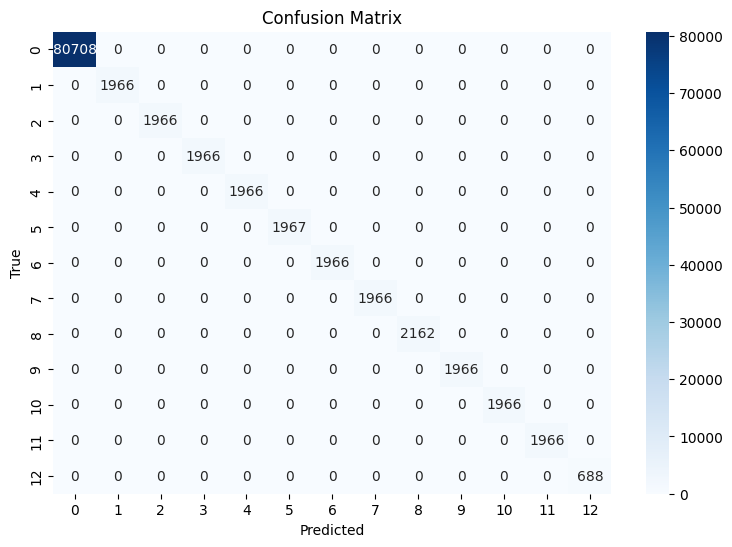

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_dtr, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Training accuracy and F1_score are 1.00. The model works best for training data. It might be overfitting also. Let's check on validation data

**Evaluation for validation data**

In [19]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_dtval = accuracy_score(y_val, y_pred_dt1)
precision_dtval= precision_score(y_val, y_pred_dt1, average = 'macro')
recall_dtval = recall_score(y_val, y_pred_dt1, average = 'macro')
f1_dtval = f1_score(y_val, y_pred_dt1, average = 'macro')
classification_rep_dtval = classification_report(y_val, y_pred_dt1, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_dtval))
print("Validation Precision: {:.2f}".format(precision_dtval))
print("Validation Recall: {:.2f}".format(recall_dtval))
print("Validation F1-score: {:.2f}".format(f1_dtval))

print("Classification Report:\n", classification_rep_dtval)

Validation Accuracy: 0.94
Validation Precision: 0.85
Validation Recall: 0.85
Validation F1-score: 0.85
Classification Report:
               precision    recall  f1-score   support

           0      0.963     0.961     0.962     20177
           1      0.850     0.890     0.870       492
           2      0.779     0.772     0.776       492
           3      0.833     0.839     0.836       492
           4      0.814     0.817     0.815       492
           5      0.912     0.947     0.929       491
           6      0.938     0.949     0.943       491
           7      0.918     0.927     0.922       492
           8      0.866     0.882     0.874       541
           9      0.833     0.853     0.843       491
          10      0.812     0.768     0.790       491
          11      0.830     0.823     0.826       491
          12      0.689     0.645     0.667       172

    accuracy                          0.938     25805
   macro avg      0.849     0.852     0.850     25805
weighte

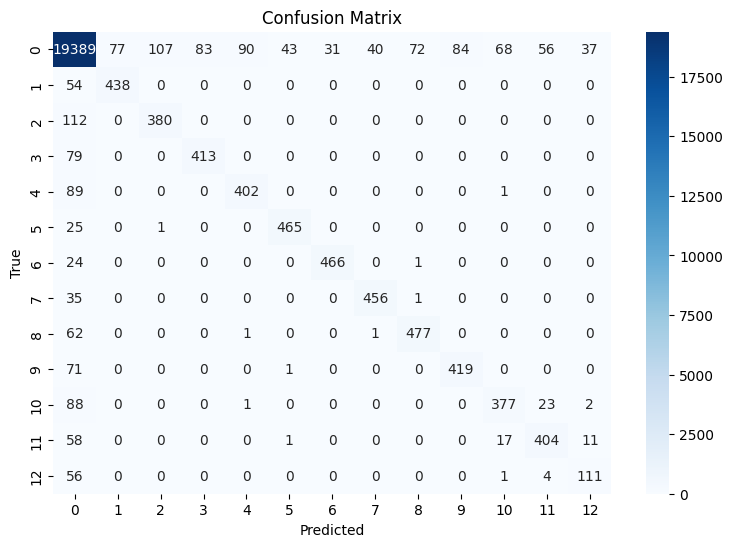

In [20]:
# Compute the confusion matrix
cm_dtval = confusion_matrix(y_val, y_pred_dt1)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_dtval, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [21]:
y_val.value_counts()

0     20177
8       541
7       492
3       492
4       492
1       492
2       492
6       491
10      491
5       491
9       491
11      491
12      172
Name: label, dtype: int64

Here, we got overfitting problem as training accuracy and F1-score are 1 and 1 respectively whereas for validation, training accuracy and validation are 0.94 and 0.84 respectively. 

**Hyperparameter tuning for decision tree classifier**

Let's do hyperparameter tuning to get rid of overfitting in decision tree.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state = 123)

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [5, 10,],
    'min_samples_split': [50, 75, 100],
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50}
Best Score: 0.9292669122135286


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50}

Best Score: 0.9292669103362734

**Building the model using best parameter**

In [24]:
# Building the model
dt_best = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=50, random_state = 123)

# Train the classifier
dt_best.fit(X_train, y_train)

# Predicting on training data
y_pred_dt_best = dt_best.predict(X_train)

# Predicting on validation data
y_pred_dt1_best = dt_best.predict(X_val)

# Predicting on testing data
y_pred_dt_test = dt_best.predict(X_test)

**Evaluating the best Decision tree model on training data**

In [25]:
# Evaluation for training data

# Calculate performance metrics
accuracy_dtr_best = accuracy_score(y_train, y_pred_dt_best)
precision_dtr_best= precision_score(y_train, y_pred_dt_best, average = 'macro')
recall_dtr_best = recall_score(y_train, y_pred_dt_best, average = 'macro')
f1_dtr_best = f1_score(y_train, y_pred_dt_best, average = 'macro')

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Decision Tree Classifier-Training")
print("="*25)
print("Best Training Accuracy: {:.2f}".format(accuracy_dtr_best))
print("Best Training Precision: {:.2f}".format(precision_dtr_best))
print("Best Training Recall: {:.2f}".format(recall_dtr_best))
print("Best Training F1-score: {:.2f}".format(f1_dtr_best))

Decision Tree Classifier-Training
Best Training Accuracy: 0.94
Best Training Precision: 0.81
Best Training Recall: 0.91
Best Training F1-score: 0.85


**Evaluating the best decision tree model on validation data**

In [26]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_dtval_best = accuracy_score(y_val, y_pred_dt1_best)
precision_dtval_best= precision_score(y_val, y_pred_dt1_best, average = 'macro')
recall_dtval_best = recall_score(y_val, y_pred_dt1_best, average = 'macro')
f1_dtval_best = f1_score(y_val, y_pred_dt1_best, average = 'macro')

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Decision Tree Classifier-Vaidation")
print("Best Validation Accuracy: {:.2f}".format(accuracy_dtval_best))
print("Best Validation Precision: {:.2f}".format(precision_dtval_best))
print("Best Validation Recall: {:.2f}".format(recall_dtval_best))
print("Best Validation F1-score: {:.2f}".format(f1_dtval_best))

Decision Tree Classifier-Vaidation
Best Validation Accuracy: 0.93
Best Validation Precision: 0.80
Best Validation Recall: 0.89
Best Validation F1-score: 0.83


**Evaluating the best decision tree model on testing data**

In [27]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_dtest= accuracy_score(y_test, y_pred_dt_test)
precision_dtest= precision_score(y_test, y_pred_dt_test, average = 'macro')
recall_dtest = recall_score(y_test, y_pred_dt_test, average = 'macro')
f1_dtest = f1_score(y_test, y_pred_dt_test, average = 'macro')

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Decision Tree Classifier-Testing")
print("Best Testing Accuracy: {:.2f}".format(accuracy_dtest))
print("Best Testing Precision: {:.2f}".format(precision_dtest))
print("Best Testing Recall: {:.2f}".format(recall_dtest))
print("Best Testing F1-score: {:.2f}".format(f1_dtest))

Decision Tree Classifier-Testing
Best Testing Accuracy: 0.93
Best Testing Precision: 0.80
Best Testing Recall: 0.89
Best Testing F1-score: 0.84


After hyperparameter tuning, we don't have overfitting problem. Pruning the tree helps a lot with overfitting problem. 

In [28]:
classification_rep_dtest = classification_report(y_test, y_pred_dt_test, digits=3)
print(classification_rep_dtest)

              precision    recall  f1-score   support

           0      0.977     0.935     0.956     25221
           1      0.863     0.964     0.911       614
           2      0.756     0.971     0.850       614
           3      0.858     0.951     0.902       614
           4      0.751     0.868     0.805       614
           5      0.813     0.840     0.826       614
           6      0.849     0.995     0.916       615
           7      0.853     0.971     0.908       614
           8      0.753     0.899     0.820       676
           9      0.716     0.979     0.827       615
          10      0.702     0.904     0.790       615
          11      0.841     0.833     0.837       615
          12      0.606     0.451     0.517       215

    accuracy                          0.930     32256
   macro avg      0.795     0.889     0.836     32256
weighted avg      0.937     0.930     0.931     32256



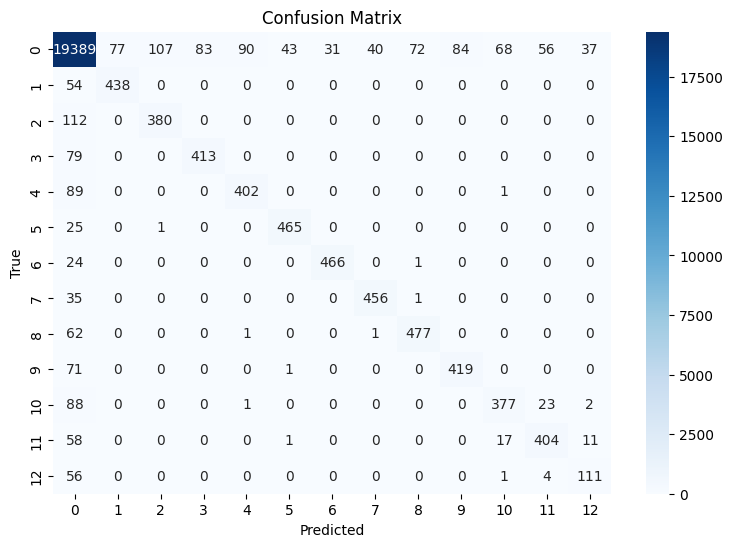

In [29]:
# Compute the confusion matrix
cm_dtval = confusion_matrix(y_val, y_pred_dt1)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_dtval, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Comparison of best Decision tree classifier result:**

Desired performance metrics: Accuracy and F1-score


In [30]:
print("Best Decision Tree classifier:")
print(dt_best)
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_dtr_best))
print("Best Validation Accuracy: {:.2f}".format(accuracy_dtval_best))
print("Best Testing Accuracy: {:.2f}".format(accuracy_dtest))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_dtr_best))
print("Best Validation F1-score: {:.2f}".format(f1_dtval_best))
print("Best Testing F1-score: {:.2f}".format(f1_dtest))


Best Decision Tree classifier:
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=50,
                       random_state=123)


Accuracy:
Best Training Accuracy: 0.94
Best Validation Accuracy: 0.93
Best Testing Accuracy: 0.93


F1-score:
Best Training F1-score: 0.85
Best Validation F1-score: 0.83
Best Testing F1-score: 0.84


**Conclusion from Decision tree for Activity Reognition Model**:

Have no overfitting problem using the best decision tree classifier. But the decision tree classifier has not been able to classify Activity 10 (Jogging) and Activity 12 (Jumping front and back) properly.

---

### **Random Forest Classifier**

**Building the model and predicting on training and validation data**

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Building the model
rf = RandomForestClassifier(random_state = 123)

# Train the classifier
rf.fit(X_train, y_train)

# Predicting on training data
y_pred_rf = rf.predict(X_train)

# Predicting on validation data
y_pred_rf1 = rf.predict(X_val)

# Predicting on testing data
y_pred_rf_test = rf.predict(X_test)

**Evaluation for training data**

In [32]:
# Evaluation for training data

# Calculate performance metrics
accuracy_rftr = accuracy_score(y_train, y_pred_rf)
precision_rftr= precision_score(y_train, y_pred_rf, average = 'macro')
recall_rftr = recall_score(y_train, y_pred_rf, average = 'macro')
f1_rftr = f1_score(y_train, y_pred_rf, average = 'macro')
classification_rep_rftr = classification_report(y_train, y_pred_rf, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_rftr))
print("Training Precision: {:.2f}".format(precision_rftr))
print("Training Recall: {:.2f}".format(recall_rftr))
print("Training F1-score: {:.2f}".format(f1_rftr))

print("Classification Report:\n", classification_rep_rftr)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     80708
           1      1.000     1.000     1.000      1966
           2      1.000     1.000     1.000      1966
           3      1.000     1.000     1.000      1966
           4      1.000     1.000     1.000      1966
           5      1.000     1.000     1.000      1967
           6      1.000     1.000     1.000      1966
           7      1.000     1.000     1.000      1966
           8      1.000     1.000     1.000      2162
           9      1.000     1.000     1.000      1966
          10      1.000     1.000     1.000      1966
          11      1.000     1.000     1.000      1966
          12      1.000     1.000     1.000       688

    accuracy                          1.000    103219
   macro avg      1.000     1.000     1.000    103219
weighted avg   

Got the same result as decision tree for training data. Probably, there could be overfitting here as well.

**Evaluation for validation data**

In [33]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_rfval = accuracy_score(y_val, y_pred_rf1)
precision_rfval= precision_score(y_val, y_pred_rf1, average = 'macro')
recall_rfval = recall_score(y_val, y_pred_rf1, average = 'macro')
f1_rfval = f1_score(y_val, y_pred_rf1, average = 'macro')
classification_rep_rfval = classification_report(y_val, y_pred_rf1, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_rfval))
print("Validation Precision: {:.2f}".format(precision_rfval))
print("Validation Recall: {:.2f}".format(recall_rfval))
print("Validation F1-score: {:.2f}".format(f1_rfval))

print("Classification Report:\n", classification_rep_rfval)

Validation Accuracy: 0.97
Validation Precision: 0.90
Validation Recall: 0.95
Validation F1-score: 0.92
Classification Report:
               precision    recall  f1-score   support

           0      0.989     0.967     0.978     20177
           1      0.894     0.990     0.939       492
           2      0.781     0.972     0.866       492
           3      0.834     0.984     0.903       492
           4      0.874     0.961     0.916       492
           5      0.998     0.908     0.951       491
           6      0.944     0.994     0.968       491
           7      0.942     0.992     0.966       492
           8      0.934     0.961     0.947       541
           9      0.832     0.951     0.888       491
          10      0.878     0.967     0.921       491
          11      0.914     0.976     0.944       491
          12      0.947     0.727     0.822       172

    accuracy                          0.966     25805
   macro avg      0.905     0.950     0.924     25805
weighte

Random Forest classifier works better than decision tree classifier. There's no much overfitting in default RF model.

**Evaluation for testing data**

In [34]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_rftest = accuracy_score(y_test, y_pred_rf_test)
precision_rftest= precision_score(y_test, y_pred_rf_test, average = 'macro')
recall_rftest = recall_score(y_test, y_pred_rf_test, average = 'macro')
f1_rftest = f1_score(y_test, y_pred_rf_test, average = 'macro')
classification_rep_rftest = classification_report(y_test, y_pred_rf_test, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_rftest))
print("Testing Precision: {:.2f}".format(precision_rftest))
print("Testing Recall: {:.2f}".format(recall_rftest))
print("Testing F1-score: {:.2f}".format(f1_rftest))

print("Classification Report:\n", classification_rep_rftest)

Testing Accuracy: 0.97
Testing Precision: 0.91
Testing Recall: 0.95
Testing F1-score: 0.93
Classification Report:
               precision    recall  f1-score   support

           0      0.990     0.970     0.980     25221
           1      0.905     0.992     0.946       614
           2      0.781     0.977     0.868       614
           3      0.871     0.976     0.920       614
           4      0.880     0.959     0.918       614
           5      0.997     0.936     0.966       614
           6      0.929     0.995     0.961       615
           7      0.920     0.992     0.955       614
           8      0.928     0.953     0.940       676
           9      0.879     0.958     0.917       615
          10      0.900     0.961     0.929       615
          11      0.926     0.977     0.951       615
          12      0.935     0.740     0.826       215

    accuracy                          0.969     32256
   macro avg      0.911     0.953     0.929     32256
weighted avg      0

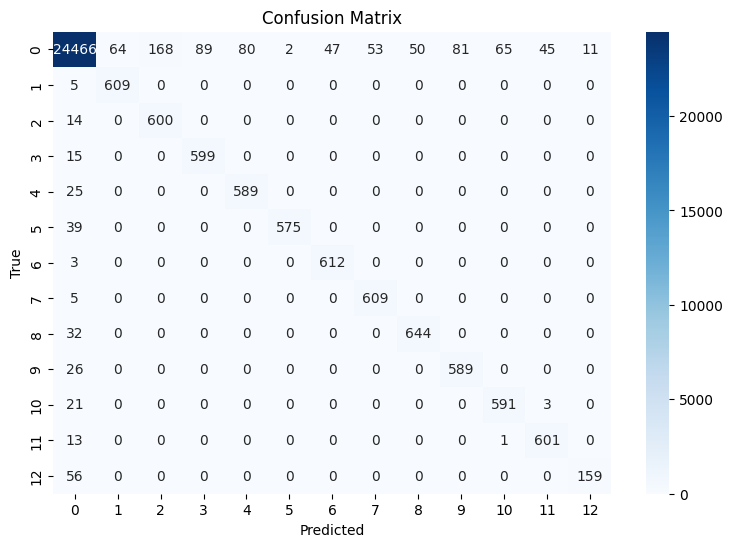

In [35]:
# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_test)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Comparison of Random Forest classifier result:**

In [36]:
print("Random Forest classifier: Subject1")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_rftr))
print("Best Validation Accuracy: {:.2f}".format(accuracy_rfval))
print("Best Testing Accuracy: {:.2f}".format(accuracy_rftest))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_rftr))
print("Best Validation F1-score: {:.2f}".format(f1_rfval))
print("Best Testing F1-score: {:.2f}".format(f1_rftest))

Random Forest classifier: Subject1


Accuracy:
Best Training Accuracy: 1.00
Best Validation Accuracy: 0.97
Best Testing Accuracy: 0.97


F1-score:
Best Training F1-score: 1.00
Best Validation F1-score: 0.92
Best Testing F1-score: 0.93


**Conclusion for Random Forest for Activity Recognition model**

It performs well as it could be able to predict all activities to some good extent. Though it didn't get accuracy and F1-score of 1, it got good accuracy score of 0.97 and F1-score of 0.93

---

### **Gradient Boosting Classifier**

**Building the model and predicting on training and validation data**

In [37]:
# Building the model
gbm = GradientBoostingClassifier()

# Train the classifier
gbm.fit(X_train, y_train)

# Predicting on training data
y_pred_gbm = gbm.predict(X_train)

# Predicting on validation data
y_pred_gbm1 = gbm.predict(X_val)

# Predicting on testing data
y_pred_gbm_test = gbm.predict(X_test)

**Evaluation for training data**

In [38]:
# Evaluation for training data

# Calculate performance metrics
accuracy_gbmtr = accuracy_score(y_train, y_pred_gbm)
precision_gbmtr= precision_score(y_train, y_pred_gbm, average = 'macro')
recall_gbmtr = recall_score(y_train, y_pred_gbm, average = 'macro')
f1_gbmtr = f1_score(y_train, y_pred_gbm, average = 'macro')
classification_rep_gbmtr = classification_report(y_train, y_pred_gbm, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_gbmtr))
print("Training Precision: {:.2f}".format(precision_gbmtr))
print("Training Recall: {:.2f}".format(recall_gbmtr))
print("Training F1-score: {:.2f}".format(f1_gbmtr))

print("Classification Report:\n", classification_rep_gbmtr)

Training Accuracy: 0.95
Training Precision: 0.89
Training Recall: 0.91
Training F1-score: 0.90
Classification Report:
               precision    recall  f1-score   support

           0      0.977     0.963     0.970     80708
           1      0.893     0.977     0.933      1966
           2      0.792     0.964     0.869      1966
           3      0.852     0.987     0.915      1966
           4      0.866     0.931     0.897      1966
           5      0.939     0.668     0.781      1967
           6      0.895     0.973     0.932      1966
           7      0.880     0.969     0.922      1966
           8      0.837     0.898     0.867      2162
           9      0.872     0.938     0.904      1966
          10      0.867     0.918     0.892      1966
          11      0.941     0.936     0.938      1966
          12      0.944     0.760     0.842       688

    accuracy                          0.954    103219
   macro avg      0.889     0.914     0.897    103219
weighted avg   

**Evaluation for validation data**

In [39]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_gbmval = accuracy_score(y_val, y_pred_gbm1)
precision_gbmval= precision_score(y_val, y_pred_gbm1, average = 'macro')
recall_gbmval = recall_score(y_val, y_pred_gbm1, average = 'macro')
f1_gbmval = f1_score(y_val, y_pred_gbm1, average = 'macro')
classification_rep_gbmval = classification_report(y_val, y_pred_gbm1, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_gbmval))
print("Validation Precision: {:.2f}".format(precision_gbmval))
print("Validation Recall: {:.2f}".format(recall_gbmval))
print("Validation F1-score: {:.2f}".format(f1_gbmval))

print("Classification Report:\n", classification_rep_gbmval)

Validation Accuracy: 0.94
Validation Precision: 0.86
Validation Recall: 0.88
Validation F1-score: 0.86
Classification Report:
               precision    recall  f1-score   support

           0      0.969     0.957     0.963     20177
           1      0.870     0.965     0.915       492
           2      0.773     0.943     0.850       492
           3      0.824     0.980     0.895       492
           4      0.832     0.888     0.859       492
           5      0.925     0.603     0.730       491
           6      0.885     0.971     0.926       491
           7      0.884     0.959     0.920       492
           8      0.848     0.908     0.877       541
           9      0.803     0.898     0.848       491
          10      0.851     0.851     0.851       491
          11      0.917     0.898     0.907       491
          12      0.767     0.593     0.669       172

    accuracy                          0.942     25805
   macro avg      0.858     0.878     0.862     25805
weighte

**Evaluation for testing data**

In [40]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_gbmtest = accuracy_score(y_test, y_pred_gbm_test)
precision_gbmtest= precision_score(y_test, y_pred_gbm_test, average = 'macro')
recall_gbmtest = recall_score(y_test, y_pred_gbm_test, average = 'macro')
f1_gbmtest = f1_score(y_test, y_pred_gbm_test, average = 'macro')
classification_rep_gbmtest = classification_report(y_test, y_pred_gbm_test, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_gbmval))
print("Testing Precision: {:.2f}".format(precision_gbmval))
print("Testing Recall: {:.2f}".format(recall_gbmval))
print("Testing F1-score: {:.2f}".format(f1_gbmval))

print("Classification Report:\n", classification_rep_gbmtest)

Testing Accuracy: 0.94
Testing Precision: 0.86
Testing Recall: 0.88
Testing F1-score: 0.86
Classification Report:
               precision    recall  f1-score   support

           0      0.970     0.958     0.964     25221
           1      0.882     0.982     0.929       614
           2      0.772     0.961     0.856       614
           3      0.860     0.977     0.915       614
           4      0.843     0.875     0.859       614
           5      0.925     0.638     0.755       614
           6      0.865     0.958     0.909       615
           7      0.863     0.954     0.906       614
           8      0.828     0.892     0.859       676
           9      0.829     0.920     0.872       615
          10      0.848     0.888     0.867       615
          11      0.930     0.860     0.894       615
          12      0.786     0.614     0.689       215

    accuracy                          0.944     32256
   macro avg      0.862     0.883     0.867     32256
weighted avg      0

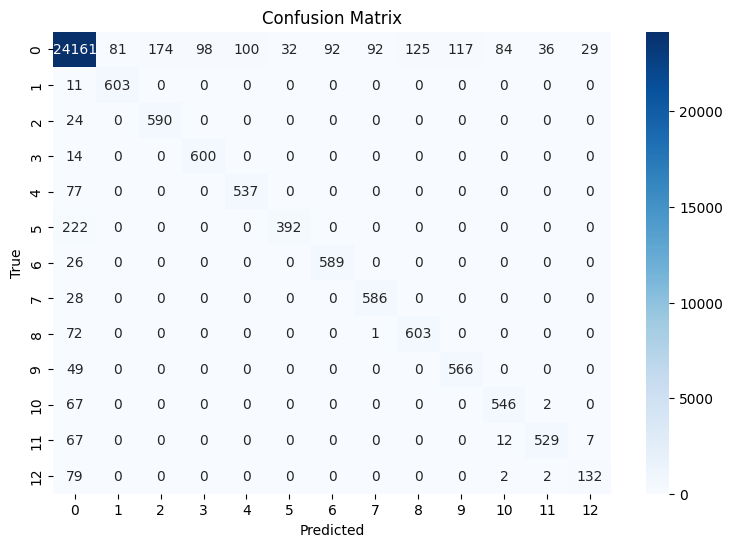

In [41]:
# Compute the confusion matrix
cm_gbm = confusion_matrix(y_test, y_pred_gbm_test)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_gbm, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Comparison of Gradient Boosting classifier result**

In [42]:
print("Gradient Boosting classifier:")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_gbmtr))
print("Best Validation Accuracy: {:.2f}".format(accuracy_gbmval))
print("Best Testing Accuracy: {:.2f}".format(accuracy_gbmtest))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_gbmtr))
print("Best Validation F1-score: {:.2f}".format(f1_gbmval))
print("Best Testing F1-score: {:.2f}".format(f1_gbmtest))

Gradient Boosting classifier:


Accuracy:
Best Training Accuracy: 0.95
Best Validation Accuracy: 0.94
Best Testing Accuracy: 0.94


F1-score:
Best Training F1-score: 0.90
Best Validation F1-score: 0.86
Best Testing F1-score: 0.87


**Conclusion for Gradient Boosting for Activity Recognition model**

It performs well as it could be able to predict all activities to some good extent. Though it didn't get accuracy and F1-score of 1, it got good accuracy score of 0.94 and F1-score of 0.87

---

### **Naive Bayes Classifier**

**Building the model and predicting on training and validation data**

In [43]:
# Building the model
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Predicting on training data
y_pred_gnb = gnb.predict(X_train)

# Predicting on validation data
y_pred_gnb1 = gnb.predict(X_val)

# Predicting on testing data
y_pred_gnb_test = gnb.predict(X_test)

**Evaluation for training data**

In [44]:
# Evaluation for training data

# Calculate performance metrics
accuracy_gnbtr = accuracy_score(y_train, y_pred_gnb)
precision_gnbtr= precision_score(y_train, y_pred_gnb, average = 'macro')
recall_gnbtr = recall_score(y_train, y_pred_gnb, average = 'macro')
f1_gnbtr = f1_score(y_train, y_pred_gnb, average = 'macro')
classification_rep_gnbtr = classification_report(y_train, y_pred_gnb, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_gnbtr))
print("Training Precision: {:.2f}".format(precision_gnbtr))
print("Training Recall: {:.2f}".format(recall_gnbtr))
print("Training F1-score: {:.2f}".format(f1_gnbtr))

print("Classification Report:\n", classification_rep_gnbtr)

Training Accuracy: 0.74
Training Precision: 0.58
Training Recall: 0.93
Training F1-score: 0.68
Classification Report:
               precision    recall  f1-score   support

           0      0.990     0.676     0.804     80708
           1      0.800     1.000     0.889      1966
           2      0.721     1.000     0.838      1966
           3      0.794     1.000     0.885      1966
           4      0.406     0.978     0.574      1966
           5      0.141     0.821     0.240      1967
           6      0.616     0.996     0.762      1966
           7      0.428     0.996     0.598      1966
           8      0.382     0.938     0.543      2162
           9      0.533     0.998     0.695      1966
          10      0.645     0.942     0.766      1966
          11      0.505     0.899     0.646      1966
          12      0.515     0.844     0.640       688

    accuracy                          0.738    103219
   macro avg      0.575     0.930     0.683    103219
weighted avg   

**Evaluation for validation data**

In [45]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_gnbval = accuracy_score(y_val, y_pred_gnb1)
precision_gnbval= precision_score(y_val, y_pred_gnb1, average = 'macro')
recall_gnbval = recall_score(y_val, y_pred_gnb1, average = 'macro')
f1_gnbval = f1_score(y_val, y_pred_gnb1, average = 'macro')
classification_rep_gnbval = classification_report(y_val, y_pred_gnb1, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_gnbval))
print("Validation Precision: {:.2f}".format(precision_gnbval))
print("Validation Recall: {:.2f}".format(recall_gnbval))
print("Validation F1-score: {:.2f}".format(f1_gnbval))

print("Classification Report:\n", classification_rep_gnbval)

Validation Accuracy: 0.73
Validation Precision: 0.57
Validation Recall: 0.93
Validation F1-score: 0.68
Classification Report:
               precision    recall  f1-score   support

           0      0.990     0.673     0.801     20177
           1      0.805     1.000     0.892       492
           2      0.705     0.996     0.826       492
           3      0.790     1.000     0.883       492
           4      0.399     0.972     0.566       492
           5      0.138     0.817     0.237       491
           6      0.606     1.000     0.755       491
           7      0.432     0.996     0.603       492
           8      0.381     0.935     0.542       541
           9      0.520     0.998     0.683       491
          10      0.652     0.929     0.766       491
          11      0.510     0.916     0.655       491
          12      0.530     0.860     0.656       172

    accuracy                          0.735     25805
   macro avg      0.574     0.930     0.682     25805
weighte

There's no overfitting but it didn't get good performance score for Activity detection model.

**Evaluation for testing data**

In [46]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_gnbtest = accuracy_score(y_test, y_pred_gnb_test)
precision_gnbtest= precision_score(y_test, y_pred_gnb_test, average = 'macro')
recall_gnbtest = recall_score(y_test, y_pred_gnb_test, average = 'macro')
f1_gnbtest = f1_score(y_test, y_pred_gnb_test, average = 'macro')
classification_rep_gnbtest = classification_report(y_test, y_pred_gnb_test, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_gnbtest))
print("Testing Precision: {:.2f}".format(precision_gnbtest))
print("Testing Recall: {:.2f}".format(recall_gnbtest))
print("Testing F1-score: {:.2f}".format(f1_gnbtest))

print("Classification Report:\n", classification_rep_gnbtest)

Testing Accuracy: 0.74
Testing Precision: 0.58
Testing Recall: 0.94
Testing F1-score: 0.69
Classification Report:
               precision    recall  f1-score   support

           0      0.991     0.683     0.809     25221
           1      0.813     1.000     0.897       614
           2      0.719     1.000     0.837       614
           3      0.808     1.000     0.894       614
           4      0.406     0.963     0.571       614
           5      0.148     0.834     0.251       614
           6      0.612     0.997     0.758       615
           7      0.428     0.997     0.599       614
           8      0.393     0.948     0.556       676
           9      0.529     0.997     0.691       615
          10      0.653     0.948     0.773       615
          11      0.500     0.904     0.644       615
          12      0.549     0.888     0.679       215

    accuracy                          0.744     32256
   macro avg      0.581     0.935     0.689     32256
weighted avg      0

**Comparison of best Naive Bayes classifier result**

In [47]:
print("Naive Bayes classifier:")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_gnbtr))
print("Best Validation Accuracy: {:.2f}".format(accuracy_gnbval))
print("Best Testing Accuracy: {:.2f}".format(accuracy_gnbtest))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_gnbtr))
print("Best Validation F1-score: {:.2f}".format(f1_gnbval))
print("Best Testing F1-score: {:.2f}".format(f1_gnbtest))

Naive Bayes classifier:


Accuracy:
Best Training Accuracy: 0.74
Best Validation Accuracy: 0.73
Best Testing Accuracy: 0.74


F1-score:
Best Training F1-score: 0.68
Best Validation F1-score: 0.68
Best Testing F1-score: 0.69


**Conclusion for Naive bayes for Activity Recognition model**

Naive Bayes is not the best bodel for the Activity Recognition as it is giving accuracy of 0.74 and F1-score of 0.68.

---

### **Deep Learning Model: Multilayer Perceptron (ANN)**

**Parameters used:**

Activation function in hidden layers: ReLu

Activation function in output layer: Softmax

Loss: Categorical Cross Entropy

Optimizer: Adam

Metrics: Accuracy

No. of Epochs: 10

Batch size: 32

**Converting target labels to categorical format**

In [48]:
# Convert the target labels to categorical format
num_classes = len(np.unique(y))
y_train_categorical = np_utils.to_categorical(y_train, num_classes)
y_val_categorical = np_utils.to_categorical(y_val, num_classes)
y_test_categorical = np_utils.to_categorical(y_test, num_classes)

**Creating the Multilayer Perceptron model**

In [49]:
# Create the MLP model
model = Sequential()
model.add(Dense(64, input_dim=23, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

**Conpiling the model**

In [50]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Training the model**

In [51]:
# Train the model
model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
3226/3226 [==============================] - 8s 2ms/step - loss: 0.6783 - accuracy: 0.8185
Epoch 2/20
3226/3226 [==============================] - 6s 2ms/step - loss: 0.3555 - accuracy: 0.8650
Epoch 3/20
3226/3226 [==============================] - 6s 2ms/step - loss: 0.3052 - accuracy: 0.8806
Epoch 4/20
3226/3226 [==============================] - 8s 3ms/step - loss: 0.2800 - accuracy: 0.8892
Epoch 5/20
3226/3226 [==============================] - 6s 2ms/step - loss: 0.2593 - accuracy: 0.8954
Epoch 6/20
3226/3226 [==============================] - 7s 2ms/step - loss: 0.2448 - accuracy: 0.9001
Epoch 7/20
3226/3226 [==============================] - 6s 2ms/step - loss: 0.2361 - accuracy: 0.9041
Epoch 8/20
3226/3226 [==============================] - 8s 2ms/step - loss: 0.2273 - accuracy: 0.9071
Epoch 9/20
3226/3226 [==============================] - 6s 2ms/step - loss: 0.2216 - accuracy: 0.9097
Epoch 10/20
3226/3226 [==============================] - 7s 2ms/step - loss: 0.214

**Evaluating the model on validation set**

In [52]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val_categorical, verbose=1)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

807/807 [==============================] - 1s 1ms/step - loss: 0.2078 - accuracy: 0.9159
Validation Loss: 0.20782144367694855
Validation Accuracy: 0.9159465432167053


**Evaluating the model on testing set**

In [53]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=1)
print('Testing Loss:', test_loss)
print('Testing Accuracy:', test_accuracy)

1008/1008 [==============================] - 2s 2ms/step - loss: 0.2009 - accuracy: 0.9182
Testing Loss: 0.20093685388565063
Testing Accuracy: 0.9182477593421936


**Conclusion of MLP model:**

MLP model has performed well as it has given following performance scores:

Validation Loss: 0.19013427197933197

Validation Accuracy: 0.9243557453155518

Testing Loss: 0.18664301931858063

Testing Accuracy: 0.9272383451461792

---

## **Subject 2**

**Creating dataframe for Subject2**

In [54]:
file_path = '/content/gdrive/MyDrive/MHEALTHDATASET/mHealth_subject2.log'

accel_chest_x = []
accel_chest_y = []
accel_chest_z = []
ecg_lead1 = []
ecg_lead2 = []
accel_ankle_x = []
accel_ankle_y = []
accel_ankle_z = []
gyro_ankle_x = []
gyro_ankle_y = []
gyro_ankle_z = []
magnet_ankle_x = []
magnet_ankle_y = []
magnet_ankle_z = []
accel_arm_x = []
accel_arm_y = []
accel_arm_z = []
gyro_arm_x = []
gyro_arm_y = []
gyro_arm_z = []
magnet_arm_x = []
magnet_arm_y = []
magnet_arm_z = []
label = []

with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        accel_chest_x.append(float(values[0]))
        accel_chest_y.append(float(values[1]))
        accel_chest_z.append(float(values[2]))
        ecg_lead1.append(float(values[3]))
        ecg_lead2.append(float(values[4]))
        accel_ankle_x.append(float(values[5]))
        accel_ankle_y.append(float(values[6]))
        accel_ankle_z.append(float(values[7]))
        gyro_ankle_x.append(float(values[8]))
        gyro_ankle_y.append(float(values[9]))
        gyro_ankle_z.append(float(values[10]))
        magnet_ankle_x.append(float(values[11]))
        magnet_ankle_y.append(float(values[12]))
        magnet_ankle_z.append(float(values[13]))
        accel_arm_x.append(float(values[14]))
        accel_arm_y.append(float(values[15]))
        accel_arm_z.append(float(values[16]))
        gyro_arm_x.append(float(values[17]))
        gyro_arm_y.append(float(values[18]))
        gyro_arm_z.append(float(values[19]))
        magnet_arm_x.append(float(values[20]))
        magnet_arm_y.append(float(values[21]))
        magnet_arm_z.append(float(values[22]))
        label.append(int(values[23]))

# Convert the lists to a pandas DataFrame

subject2 = pd.DataFrame({
    'accel_chest_x': accel_chest_x,
    'accel_chest_y': accel_chest_y,
    'accel_chest_z': accel_chest_z,
    'ecg_lead1': ecg_lead1,
    'ecg_lead2': ecg_lead2,
    'accel_ankle_x': accel_ankle_x,
    'accel_ankle_y': accel_ankle_y,
    'accel_ankle_z': accel_ankle_z,
    'gyro_ankle_x': gyro_ankle_x,
    'gyro_ankle_y': gyro_ankle_y,
    'gyro_ankle_z': gyro_ankle_z,
    'magnet_ankle_x': magnet_ankle_x,
    'magnet_ankle_y': magnet_ankle_y,
    'magnet_ankle_z': magnet_ankle_z,
    'accel_arm_x': accel_arm_x,
    'accel_arm_y': accel_arm_y,
    'accel_arm_z': accel_arm_z,
    'gyro_arm_x': gyro_arm_x,
    'gyro_arm_y': gyro_arm_y,
    'gyro_arm_z': gyro_arm_z,
    'magnet_arm_x': magnet_arm_x,
    'magnet_arm_y': magnet_arm_y,
    'magnet_arm_z': magnet_arm_z,
    'label': label
})


In [55]:
subject2.head()

,accel_chest_x,accel_chest_y,accel_chest_z,ecg_lead1,ecg_lead2,accel_ankle_x,accel_ankle_y,accel_ankle_z,gyro_ankle_x,gyro_ankle_y,...,accel_arm_x,accel_arm_y,accel_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,label
0,-9.8646,0.298600,1.6900,-0.25955,-0.146520,0.49965,-9.6680,1.5216,-0.47866,-0.53471,...,-4.6451,-8.2508,1.9208,-0.98039,-0.41889,0.18966,0.72891,1.07810,-0.357210,0
1,-9.7753,0.381060,1.6132,-0.12977,-0.058608,0.40572,-9.5801,1.4001,-0.48423,-0.54409,...,-4.7847,-8.2609,1.9099,-0.98039,-0.41889,0.18966,0.18670,0.71683,-0.725460,0
2,-9.6195,0.169430,1.7205,-0.10466,-0.037677,0.42741,-9.6488,1.4593,-0.48423,-0.54409,...,-4.4974,-8.3198,2.0215,-0.97647,-0.42094,0.20043,0.18855,0.90189,-0.366260,0
3,-9.7610,0.169380,1.5837,-0.11722,-0.037677,0.32193,-9.4522,1.3119,-0.48423,-0.54409,...,-4.6902,-8.4318,1.8180,-0.97647,-0.42094,0.20043,0.18677,0.72405,-0.003505,0
4,-9.8078,-0.013582,1.6514,-0.13815,-0.054422,0.46731,-9.6397,1.3769,-0.49165,-0.52345,...,-4.7595,-8.4420,1.7966,-0.97647,-0.42094,0.20043,0.74339,2.52610,-0.732410,0


In [56]:
X2 = subject2.iloc[:,:-1]
y2 = subject2.iloc[:,-1]

In [57]:
X_train_org2, X_test2, y_train_org2, y_test2 = train_test_split(X2, y2, stratify=y2, random_state = 55, test_size= 0.20)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train_org2, y_train_org2, stratify=y_train_org2, random_state = 55, test_size= 0.20)

### **Random Forest Classifier**

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Building the model
rf2 = RandomForestClassifier(random_state = 123)

# Train the classifier
rf2.fit(X_train2, y_train2)

# Predicting on training data
y_pred_rf2 = rf2.predict(X_train2)

# Predicting on validation data
y_pred_rf12 = rf2.predict(X_val2)

# Predicting on testing data
y_pred_rf_test2 = rf2.predict(X_test2)

In [59]:
# Evaluation for training data

# Calculate performance metrics
accuracy_rftr2 = accuracy_score(y_train2, y_pred_rf2)
precision_rftr2= precision_score(y_train2, y_pred_rf2, average = 'macro')
recall_rftr2 = recall_score(y_train2, y_pred_rf2, average = 'macro')
f1_rftr2 = f1_score(y_train2, y_pred_rf2, average = 'macro')
classification_rep_rftr2 = classification_report(y_train2, y_pred_rf2, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_rftr2))
print("Training Precision: {:.2f}".format(precision_rftr2))
print("Training Recall: {:.2f}".format(recall_rftr2))
print("Training F1-score: {:.2f}".format(f1_rftr2))

print("Classification Report:\n", classification_rep_rftr2)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     60818
           1      1.000     1.000     1.000      1966
           2      1.000     1.000     1.000      1966
           3      1.000     1.000     1.000      1966
           4      1.000     1.000     1.000      1966
           5      1.000     1.000     1.000      1966
           6      1.000     1.000     1.000      2031
           7      1.000     1.000     1.000      2130
           8      1.000     1.000     1.000      2195
           9      1.000     1.000     1.000      1966
          10      1.000     1.000     1.000      1966
          11      1.000     1.000     1.000      1967
          12      1.000     1.000     1.000       655

    accuracy                          1.000     83558
   macro avg      1.000     1.000     1.000     83558
weighted avg   

In [60]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_rfval2 = accuracy_score(y_val2, y_pred_rf12)
precision_rfval2= precision_score(y_val2, y_pred_rf12, average = 'macro')
recall_rfval2 = recall_score(y_val2, y_pred_rf12, average = 'macro')
f1_rfval2 = f1_score(y_val2, y_pred_rf12, average = 'macro')
classification_rep_rfval2 = classification_report(y_val2, y_pred_rf12, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_rfval2))
print("Validation Precision: {:.2f}".format(precision_rfval2))
print("Validation Recall: {:.2f}".format(recall_rfval2))
print("Validation F1-score: {:.2f}".format(f1_rfval2))

print("Classification Report:\n", classification_rep_rfval2)

Validation Accuracy: 0.96
Validation Precision: 0.91
Validation Recall: 0.94
Validation F1-score: 0.92
Classification Report:
               precision    recall  f1-score   support

           0      0.987     0.965     0.976     15205
           1      0.891     0.980     0.933       491
           2      0.800     0.965     0.875       492
           3      0.891     0.982     0.934       491
           4      0.893     0.988     0.938       492
           5      1.000     0.919     0.958       492
           6      0.967     0.990     0.979       508
           7      0.941     0.996     0.968       532
           8      0.952     0.976     0.964       549
           9      0.923     0.976     0.949       491
          10      0.818     0.929     0.870       492
          11      0.838     0.882     0.859       491
          12      0.972     0.646     0.777       164

    accuracy                          0.962     20890
   macro avg      0.913     0.938     0.921     20890
weighte

In [61]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_rftest2 = accuracy_score(y_test2, y_pred_rf_test2)
precision_rftest2= precision_score(y_test2, y_pred_rf_test2, average = 'macro')
recall_rftest2 = recall_score(y_test2, y_pred_rf_test2, average = 'macro')
f1_rftest2 = f1_score(y_test2, y_pred_rf_test2, average = 'macro')
classification_rep_rftest2 = classification_report(y_test2, y_pred_rf_test2, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_rftest2))
print("Testing Precision: {:.2f}".format(precision_rftest2))
print("Testing Recall: {:.2f}".format(recall_rftest2))
print("Testing F1-score: {:.2f}".format(f1_rftest2))

print("Classification Report:\n", classification_rep_rftest2)

Testing Accuracy: 0.96
Testing Precision: 0.91
Testing Recall: 0.94
Testing F1-score: 0.92
Classification Report:
               precision    recall  f1-score   support

           0      0.987     0.967     0.977     19006
           1      0.899     0.967     0.932       615
           2      0.838     0.966     0.897       614
           3      0.860     0.985     0.918       615
           4      0.894     0.989     0.939       614
           5      1.000     0.935     0.966       614
           6      0.969     0.994     0.981       635
           7      0.957     0.997     0.976       666
           8      0.964     0.975     0.970       686
           9      0.906     0.956     0.930       615
          10      0.853     0.933     0.891       614
          11      0.849     0.909     0.878       614
          12      0.906     0.610     0.729       205

    accuracy                          0.964     26113
   macro avg      0.914     0.937     0.922     26113
weighted avg      0

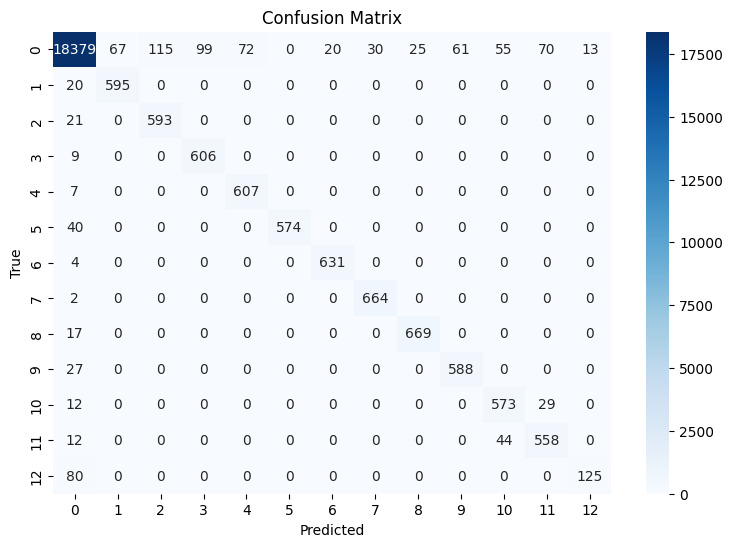

In [62]:
# Compute the confusion matrix
cm_rf2 = confusion_matrix(y_test2, y_pred_rf_test2)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_rf2, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [63]:
print("Random Forest classifier: Subject2")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_rftr2))
print("Best Validation Accuracy: {:.2f}".format(accuracy_rfval2))
print("Best Testing Accuracy: {:.2f}".format(accuracy_rftest2))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_rftr2))
print("Best Validation F1-score: {:.2f}".format(f1_rfval2))
print("Best Testing F1-score: {:.2f}".format(f1_rftest2))

Random Forest classifier: Subject2


Accuracy:
Best Training Accuracy: 1.00
Best Validation Accuracy: 0.96
Best Testing Accuracy: 0.96


F1-score:
Best Training F1-score: 1.00
Best Validation F1-score: 0.92
Best Testing F1-score: 0.92


### **Multilayer Perceptron (ANN)**

In [64]:
# Convert the target labels to categorical format
num_classes2 = len(np.unique(y2))
y_train_categorical2 = np_utils.to_categorical(y_train2, num_classes2)
y_val_categorical2 = np_utils.to_categorical(y_val2, num_classes2)
y_test_categorical2 = np_utils.to_categorical(y_test2, num_classes2)

# Create the MLP model
model2 = Sequential()
model2.add(Dense(64, input_dim=23, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(num_classes2, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model2.fit(X_train2, y_train_categorical2, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the validation set
val_loss2, val_accuracy2 = model2.evaluate(X_val2, y_val_categorical2, verbose=1)
print('Validation Loss:', val_loss2)
print('Validation Accuracy:', val_accuracy2)

# Evaluate the model on the testing set
test_loss2, test_accuracy2 = model2.evaluate(X_test2, y_test_categorical2, verbose=1)
print('Testing Loss:', test_loss2)
print('Testing Accuracy:', test_accuracy2)

Epoch 1/20
2612/2612 [==============================] - 6s 2ms/step - loss: 0.7066 - accuracy: 0.7922
Epoch 2/20
2612/2612 [==============================] - 7s 3ms/step - loss: 0.3899 - accuracy: 0.8441
Epoch 3/20
2612/2612 [==============================] - 5s 2ms/step - loss: 0.3367 - accuracy: 0.8598
Epoch 4/20
2612/2612 [==============================] - 5s 2ms/step - loss: 0.3083 - accuracy: 0.8689
Epoch 5/20
2612/2612 [==============================] - 6s 2ms/step - loss: 0.2921 - accuracy: 0.8753
Epoch 6/20
2612/2612 [==============================] - 5s 2ms/step - loss: 0.2777 - accuracy: 0.8813
Epoch 7/20
2612/2612 [==============================] - 5s 2ms/step - loss: 0.2659 - accuracy: 0.8859
Epoch 8/20
2612/2612 [==============================] - 6s 2ms/step - loss: 0.2580 - accuracy: 0.8902
Epoch 9/20
2612/2612 [==============================] - 5s 2ms/step - loss: 0.2514 - accuracy: 0.8930
Epoch 10/20
2612/2612 [==============================] - 6s 2ms/step - loss: 0.245

## **Subject 3**

**Creating dataframe for Subject3**

In [65]:
file_path = '/content/gdrive/MyDrive/MHEALTHDATASET/mHealth_subject3.log'

accel_chest_x = []
accel_chest_y = []
accel_chest_z = []
ecg_lead1 = []
ecg_lead2 = []
accel_ankle_x = []
accel_ankle_y = []
accel_ankle_z = []
gyro_ankle_x = []
gyro_ankle_y = []
gyro_ankle_z = []
magnet_ankle_x = []
magnet_ankle_y = []
magnet_ankle_z = []
accel_arm_x = []
accel_arm_y = []
accel_arm_z = []
gyro_arm_x = []
gyro_arm_y = []
gyro_arm_z = []
magnet_arm_x = []
magnet_arm_y = []
magnet_arm_z = []
label = []

with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        accel_chest_x.append(float(values[0]))
        accel_chest_y.append(float(values[1]))
        accel_chest_z.append(float(values[2]))
        ecg_lead1.append(float(values[3]))
        ecg_lead2.append(float(values[4]))
        accel_ankle_x.append(float(values[5]))
        accel_ankle_y.append(float(values[6]))
        accel_ankle_z.append(float(values[7]))
        gyro_ankle_x.append(float(values[8]))
        gyro_ankle_y.append(float(values[9]))
        gyro_ankle_z.append(float(values[10]))
        magnet_ankle_x.append(float(values[11]))
        magnet_ankle_y.append(float(values[12]))
        magnet_ankle_z.append(float(values[13]))
        accel_arm_x.append(float(values[14]))
        accel_arm_y.append(float(values[15]))
        accel_arm_z.append(float(values[16]))
        gyro_arm_x.append(float(values[17]))
        gyro_arm_y.append(float(values[18]))
        gyro_arm_z.append(float(values[19]))
        magnet_arm_x.append(float(values[20]))
        magnet_arm_y.append(float(values[21]))
        magnet_arm_z.append(float(values[22]))
        label.append(int(values[23]))

# Convert the lists to a pandas DataFrame

subject3 = pd.DataFrame({
    'accel_chest_x': accel_chest_x,
    'accel_chest_y': accel_chest_y,
    'accel_chest_z': accel_chest_z,
    'ecg_lead1': ecg_lead1,
    'ecg_lead2': ecg_lead2,
    'accel_ankle_x': accel_ankle_x,
    'accel_ankle_y': accel_ankle_y,
    'accel_ankle_z': accel_ankle_z,
    'gyro_ankle_x': gyro_ankle_x,
    'gyro_ankle_y': gyro_ankle_y,
    'gyro_ankle_z': gyro_ankle_z,
    'magnet_ankle_x': magnet_ankle_x,
    'magnet_ankle_y': magnet_ankle_y,
    'magnet_ankle_z': magnet_ankle_z,
    'accel_arm_x': accel_arm_x,
    'accel_arm_y': accel_arm_y,
    'accel_arm_z': accel_arm_z,
    'gyro_arm_x': gyro_arm_x,
    'gyro_arm_y': gyro_arm_y,
    'gyro_arm_z': gyro_arm_z,
    'magnet_arm_x': magnet_arm_x,
    'magnet_arm_y': magnet_arm_y,
    'magnet_arm_z': magnet_arm_z,
    'label': label
})


In [66]:
subject3.head()

,accel_chest_x,accel_chest_y,accel_chest_z,ecg_lead1,ecg_lead2,accel_ankle_x,accel_ankle_y,accel_ankle_z,gyro_ankle_x,gyro_ankle_y,...,accel_arm_x,accel_arm_y,accel_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,label
0,-9.4674,0.13721,1.0545,0.23862,-0.033490,-0.18848,-9.8425,0.90183,0.55659,-0.83490,...,-9.0897,2.0431,1.3105,-0.75490,-0.22998,0.78233,-1.605100,1.0685,-3.65290,0
1,-9.5991,0.15481,1.1824,0.22606,-0.079540,-0.36263,-9.7832,0.89263,0.55659,-0.83490,...,-9.6010,1.8242,1.4245,-0.75490,-0.22998,0.78233,-2.101500,5.2904,0.62709,0
2,-9.8612,0.13317,1.0646,0.20513,-0.096285,-0.24823,-9.8010,1.09080,0.57885,-0.84615,...,-8.7446,2.4401,1.0074,-0.75490,-0.22998,0.78233,0.565620,2.7021,-1.45980,0
3,-9.6398,0.17406,1.2367,0.18420,-0.062794,-0.25027,-9.6730,1.01380,0.57885,-0.84615,...,-9.8947,1.9019,1.1888,-0.75490,-0.22998,0.78233,0.244770,6.5233,-0.78236,0
4,-10.0360,0.26062,1.2761,0.12559,-0.025118,-0.20668,-9.9102,1.05450,0.57885,-0.84615,...,-9.6522,2.0140,1.4028,-0.75294,-0.22998,0.76293,0.034368,3.4368,-1.11670,0


In [67]:
X3 = subject3.iloc[:,:-1]
y3 = subject3.iloc[:,-1]

In [68]:
X_train_org3, X_test3, y_train_org3, y_test3 = train_test_split(X3, y3, stratify=y3, random_state = 55, test_size= 0.20)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train_org3, y_train_org3, stratify=y_train_org3, random_state = 55, test_size= 0.20)

### **Random Forest Classifier**

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Building the model
rf3 = RandomForestClassifier(random_state = 123)

# Train the classifier
rf3.fit(X_train3, y_train3)

# Predicting on training data
y_pred_rf3 = rf3.predict(X_train3)

# Predicting on validation data
y_pred_rf13 = rf3.predict(X_val3)

# Predicting on testing data
y_pred_rf_test3 = rf3.predict(X_test3)

In [70]:
# Evaluation for training data

# Calculate performance metrics
accuracy_rftr3 = accuracy_score(y_train3, y_pred_rf3)
precision_rftr3= precision_score(y_train3, y_pred_rf3, average = 'macro')
recall_rftr3 = recall_score(y_train3, y_pred_rf3, average = 'macro')
f1_rftr3 = f1_score(y_train3, y_pred_rf3, average = 'macro')
classification_rep_rftr3 = classification_report(y_train3, y_pred_rf3, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_rftr3))
print("Training Precision: {:.2f}".format(precision_rftr3))
print("Training Recall: {:.2f}".format(recall_rftr3))
print("Training F1-score: {:.2f}".format(f1_rftr3))

print("Classification Report:\n", classification_rep_rftr3)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     55508
           1      1.000     1.000     1.000      1966
           2      1.000     1.000     1.000      1966
           3      1.000     1.000     1.000      1966
           4      1.000     1.000     1.000      1966
           5      1.000     1.000     1.000      1966
           6      1.000     1.000     1.000      2065
           7      1.000     1.000     1.000      2162
           8      1.000     1.000     1.000      2032
           9      1.000     1.000     1.000      1966
          10      1.000     1.000     1.000      1966
          11      1.000     1.000     1.000      1967
          12      1.000     1.000     1.000       655

    accuracy                          1.000     78151
   macro avg      1.000     1.000     1.000     78151
weighted avg   

In [71]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_rfval3 = accuracy_score(y_val3, y_pred_rf13)
precision_rfval3= precision_score(y_val3, y_pred_rf13, average = 'macro')
recall_rfval3 = recall_score(y_val3, y_pred_rf13, average = 'macro')
f1_rfval3 = f1_score(y_val3, y_pred_rf13, average = 'macro')
classification_rep_rfval3 = classification_report(y_val3, y_pred_rf13, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_rfval3))
print("Validation Precision: {:.2f}".format(precision_rfval3))
print("Validation Recall: {:.2f}".format(recall_rfval3))
print("Validation F1-score: {:.2f}".format(f1_rfval3))

print("Classification Report:\n", classification_rep_rfval3)

Validation Accuracy: 0.96
Validation Precision: 0.93
Validation Recall: 0.94
Validation F1-score: 0.93
Classification Report:
               precision    recall  f1-score   support

           0      0.979     0.969     0.974     13877
           1      0.973     0.969     0.971       491
           2      0.924     0.963     0.943       492
           3      0.880     0.990     0.932       491
           4      0.916     0.933     0.924       492
           5      1.000     0.890     0.942       492
           6      0.973     0.990     0.982       516
           7      0.908     0.983     0.944       541
           8      0.969     0.972     0.971       508
           9      0.878     0.849     0.863       491
          10      0.889     0.974     0.929       492
          11      0.902     0.992     0.945       491
          12      0.912     0.695     0.789       164

    accuracy                          0.963     19538
   macro avg      0.931     0.936     0.932     19538
weighte

In [72]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_rftest3 = accuracy_score(y_test3, y_pred_rf_test3)
precision_rftest3= precision_score(y_test3, y_pred_rf_test3, average = 'macro')
recall_rftest3 = recall_score(y_test3, y_pred_rf_test3, average = 'macro')
f1_rftest3 = f1_score(y_test3, y_pred_rf_test3, average = 'macro')
classification_rep_rftest3 = classification_report(y_test3, y_pred_rf_test3, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_rftest3))
print("Testing Precision: {:.2f}".format(precision_rftest3))
print("Testing Recall: {:.2f}".format(recall_rftest3))
print("Testing F1-score: {:.2f}".format(f1_rftest3))

print("Classification Report:\n", classification_rep_rftest3)

Testing Accuracy: 0.97
Testing Precision: 0.93
Testing Recall: 0.95
Testing F1-score: 0.94
Classification Report:
               precision    recall  f1-score   support

           0      0.983     0.968     0.975     17347
           1      0.968     0.990     0.979       615
           2      0.893     0.982     0.936       614
           3      0.892     0.982     0.935       615
           4      0.881     0.930     0.905       614
           5      1.000     0.917     0.957       614
           6      0.977     0.991     0.984       645
           7      0.924     0.996     0.959       676
           8      0.975     0.973     0.974       635
           9      0.888     0.880     0.884       615
          10      0.893     0.976     0.932       614
          11      0.900     0.995     0.945       614
          12      0.858     0.766     0.809       205

    accuracy                          0.965     24423
   macro avg      0.926     0.950     0.936     24423
weighted avg      0

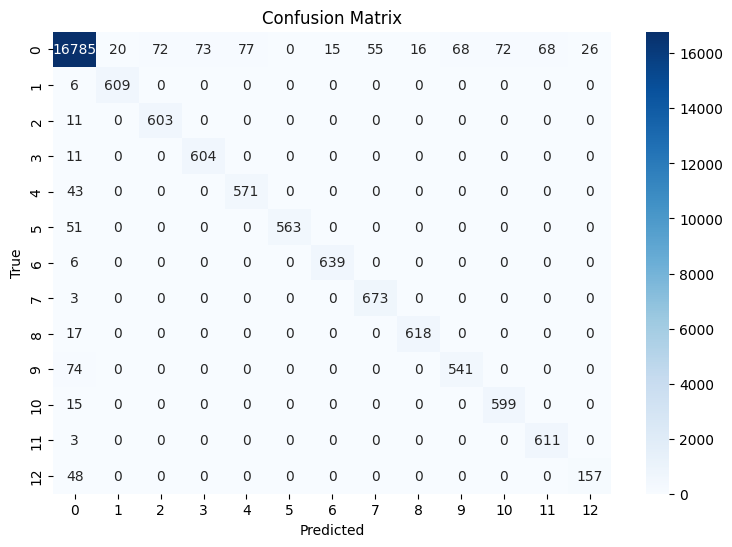

In [73]:
# Compute the confusion matrix
cm_rf3 = confusion_matrix(y_test3, y_pred_rf_test3)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_rf3, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [74]:
print("Random Forest classifier: Subject3")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_rftr3))
print("Best Validation Accuracy: {:.2f}".format(accuracy_rfval3))
print("Best Testing Accuracy: {:.2f}".format(accuracy_rftest3))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_rftr3))
print("Best Validation F1-score: {:.2f}".format(f1_rfval3))
print("Best Testing F1-score: {:.2f}".format(f1_rftest3))

Random Forest classifier: Subject3


Accuracy:
Best Training Accuracy: 1.00
Best Validation Accuracy: 0.96
Best Testing Accuracy: 0.97


F1-score:
Best Training F1-score: 1.00
Best Validation F1-score: 0.93
Best Testing F1-score: 0.94


### **Multilayer Perceptron (ANN)**

In [75]:
# Convert the target labels to categorical format
num_classes3 = len(np.unique(y3))
y_train_categorical3 = np_utils.to_categorical(y_train3, num_classes3)
y_val_categorical3 = np_utils.to_categorical(y_val3, num_classes3)
y_test_categorical3 = np_utils.to_categorical(y_test3, num_classes3)

# Create the MLP model
model3 = Sequential()
model3.add(Dense(64, input_dim=23, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes3, activation='softmax'))

# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model3.fit(X_train3, y_train_categorical3, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the validation set
val_loss3, val_accuracy3 = model3.evaluate(X_val3, y_val_categorical3, verbose=1)
print('Validation Loss:', val_loss3)
print('Validation Accuracy:', val_accuracy3)

# Evaluate the model on the testing set
test_loss3, test_accuracy3 = model3.evaluate(X_test3, y_test_categorical3, verbose=1)
print('Testing Loss:', test_loss3)
print('Testing Accuracy:', test_accuracy3)

Epoch 1/20
2443/2443 [==============================] - 6s 2ms/step - loss: 0.9191 - accuracy: 0.7611
Epoch 2/20
2443/2443 [==============================] - 6s 2ms/step - loss: 0.4576 - accuracy: 0.8261
Epoch 3/20
2443/2443 [==============================] - 5s 2ms/step - loss: 0.3810 - accuracy: 0.8480
Epoch 4/20
2443/2443 [==============================] - 6s 2ms/step - loss: 0.3450 - accuracy: 0.8597
Epoch 5/20
2443/2443 [==============================] - 5s 2ms/step - loss: 0.3209 - accuracy: 0.8685
Epoch 6/20
2443/2443 [==============================] - 5s 2ms/step - loss: 0.3027 - accuracy: 0.8735
Epoch 7/20
2443/2443 [==============================] - 6s 3ms/step - loss: 0.2919 - accuracy: 0.8791
Epoch 8/20
2443/2443 [==============================] - 5s 2ms/step - loss: 0.2810 - accuracy: 0.8830
Epoch 9/20
2443/2443 [==============================] - 5s 2ms/step - loss: 0.2715 - accuracy: 0.8879
Epoch 10/20
2443/2443 [==============================] - 6s 2ms/step - loss: 0.267

## **Subject 4**

**Creating dataframe for Subject4**

In [76]:
file_path = '/content/gdrive/MyDrive/MHEALTHDATASET/mHealth_subject4.log'

accel_chest_x = []
accel_chest_y = []
accel_chest_z = []
ecg_lead1 = []
ecg_lead2 = []
accel_ankle_x = []
accel_ankle_y = []
accel_ankle_z = []
gyro_ankle_x = []
gyro_ankle_y = []
gyro_ankle_z = []
magnet_ankle_x = []
magnet_ankle_y = []
magnet_ankle_z = []
accel_arm_x = []
accel_arm_y = []
accel_arm_z = []
gyro_arm_x = []
gyro_arm_y = []
gyro_arm_z = []
magnet_arm_x = []
magnet_arm_y = []
magnet_arm_z = []
label = []

with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        accel_chest_x.append(float(values[0]))
        accel_chest_y.append(float(values[1]))
        accel_chest_z.append(float(values[2]))
        ecg_lead1.append(float(values[3]))
        ecg_lead2.append(float(values[4]))
        accel_ankle_x.append(float(values[5]))
        accel_ankle_y.append(float(values[6]))
        accel_ankle_z.append(float(values[7]))
        gyro_ankle_x.append(float(values[8]))
        gyro_ankle_y.append(float(values[9]))
        gyro_ankle_z.append(float(values[10]))
        magnet_ankle_x.append(float(values[11]))
        magnet_ankle_y.append(float(values[12]))
        magnet_ankle_z.append(float(values[13]))
        accel_arm_x.append(float(values[14]))
        accel_arm_y.append(float(values[15]))
        accel_arm_z.append(float(values[16]))
        gyro_arm_x.append(float(values[17]))
        gyro_arm_y.append(float(values[18]))
        gyro_arm_z.append(float(values[19]))
        magnet_arm_x.append(float(values[20]))
        magnet_arm_y.append(float(values[21]))
        magnet_arm_z.append(float(values[22]))
        label.append(int(values[23]))

# Convert the lists to a pandas DataFrame

subject4 = pd.DataFrame({
    'accel_chest_x': accel_chest_x,
    'accel_chest_y': accel_chest_y,
    'accel_chest_z': accel_chest_z,
    'ecg_lead1': ecg_lead1,
    'ecg_lead2': ecg_lead2,
    'accel_ankle_x': accel_ankle_x,
    'accel_ankle_y': accel_ankle_y,
    'accel_ankle_z': accel_ankle_z,
    'gyro_ankle_x': gyro_ankle_x,
    'gyro_ankle_y': gyro_ankle_y,
    'gyro_ankle_z': gyro_ankle_z,
    'magnet_ankle_x': magnet_ankle_x,
    'magnet_ankle_y': magnet_ankle_y,
    'magnet_ankle_z': magnet_ankle_z,
    'accel_arm_x': accel_arm_x,
    'accel_arm_y': accel_arm_y,
    'accel_arm_z': accel_arm_z,
    'gyro_arm_x': gyro_arm_x,
    'gyro_arm_y': gyro_arm_y,
    'gyro_arm_z': gyro_arm_z,
    'magnet_arm_x': magnet_arm_x,
    'magnet_arm_y': magnet_arm_y,
    'magnet_arm_z': magnet_arm_z,
    'label': label
})


In [77]:
subject4.head()

,accel_chest_x,accel_chest_y,accel_chest_z,ecg_lead1,ecg_lead2,accel_ankle_x,accel_ankle_y,accel_ankle_z,gyro_ankle_x,gyro_ankle_y,...,accel_arm_x,accel_arm_y,accel_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,label
0,-2.1230,2.1088,-8.9576,-0.108840,-0.44793,1.5686,-9.6207,0.30548,-0.80891,-0.81238,...,-6.7368,-6.6124,2.7631,-1.2333,-0.47844,-0.051724,1.76210,-3.3198,-3.5417,0
1,-1.8362,1.9103,-9.0281,-0.096285,-0.43119,1.4369,-9.8798,0.13496,-0.80148,-0.81989,...,-6.4254,-6.5098,3.0183,-1.2333,-0.47844,-0.051724,0.29516,-6.3904,-3.5403,0
2,-1.9329,1.6969,-8.9946,-0.083726,-0.42282,1.3765,-9.8390,0.26140,-0.80148,-0.81989,...,-6.5062,-6.7122,2.7790,-1.2333,-0.47844,-0.051724,-0.77827,-6.0134,-3.2045,0
3,-2.0768,1.8189,-9.2153,-0.092098,-0.38514,1.4263,-9.7102,0.26834,-0.80148,-0.81989,...,-5.9060,-6.7621,2.7869,-1.2490,-0.46817,-0.045259,-0.61505,-7.6446,-2.8239,0
4,-1.6793,2.1446,-9.0701,-0.117220,-0.40188,1.8053,-9.8988,0.22103,-0.81262,-0.82176,...,-6.7218,-6.8831,2.6871,-1.2490,-0.46817,-0.045259,-1.50340,-6.7105,-1.0460,0


In [78]:
X4 = subject4.iloc[:,:-1]
y4 = subject4.iloc[:,-1]

In [79]:
X_train_org4, X_test4, y_train_org4, y_test4 = train_test_split(X4, y4, stratify=y4, random_state = 55, test_size= 0.20)
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train_org4, y_train_org4, stratify=y_train_org4, random_state = 55, test_size= 0.20)

### **Random Forest Classifier**

In [80]:
from sklearn.ensemble import RandomForestClassifier

# Building the model
rf4 = RandomForestClassifier(random_state = 123)

# Train the classifier
rf4.fit(X_train4, y_train4)

# Predicting on training data
y_pred_rf4 = rf4.predict(X_train4)

# Predicting on validation data
y_pred_rf14 = rf4.predict(X_val4)

# Predicting on testing data
y_pred_rf_test4 = rf4.predict(X_test4)

In [81]:
# Evaluation for training data

# Calculate performance metrics
accuracy_rftr4 = accuracy_score(y_train4, y_pred_rf4)
precision_rftr4= precision_score(y_train4, y_pred_rf4, average = 'macro')
recall_rftr4 = recall_score(y_train4, y_pred_rf4, average = 'macro')
f1_rftr4 = f1_score(y_train4, y_pred_rf4, average = 'macro')
classification_rep_rftr4 = classification_report(y_train4, y_pred_rf4, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_rftr4))
print("Training Precision: {:.2f}".format(precision_rftr4))
print("Training Recall: {:.2f}".format(recall_rftr4))
print("Training F1-score: {:.2f}".format(f1_rftr4))

print("Classification Report:\n", classification_rep_rftr4)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     52101
           1      1.000     1.000     1.000      1966
           2      1.000     1.000     1.000      1966
           3      1.000     1.000     1.000      1966
           4      1.000     1.000     1.000      1966
           5      1.000     1.000     1.000      1966
           6      1.000     1.000     1.000      2130
           7      1.000     1.000     1.000      2097
           8      1.000     1.000     1.000      1998
           9      1.000     1.000     1.000      1966
          10      1.000     1.000     1.000      1967
          11      1.000     1.000     1.000      1966
          12      1.000     1.000     1.000       655

    accuracy                          1.000     74710
   macro avg      1.000     1.000     1.000     74710
weighted avg   

In [82]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_rfval4 = accuracy_score(y_val4, y_pred_rf14)
precision_rfval4= precision_score(y_val4, y_pred_rf14, average = 'macro')
recall_rfval4 = recall_score(y_val4, y_pred_rf14, average = 'macro')
f1_rfval4 = f1_score(y_val4, y_pred_rf14, average = 'macro')
classification_rep_rfval4 = classification_report(y_val4, y_pred_rf14, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_rfval4))
print("Validation Precision: {:.2f}".format(precision_rfval4))
print("Validation Recall: {:.2f}".format(recall_rfval4))
print("Validation F1-score: {:.2f}".format(f1_rfval4))

print("Classification Report:\n", classification_rep_rfval4)

Validation Accuracy: 0.96
Validation Precision: 0.92
Validation Recall: 0.96
Validation F1-score: 0.94
Classification Report:
               precision    recall  f1-score   support

           0      0.985     0.961     0.973     13025
           1      0.908     0.988     0.946       492
           2      0.892     0.961     0.926       492
           3      0.850     0.990     0.914       491
           4      0.900     0.992     0.944       492
           5      1.000     0.945     0.972       492
           6      0.984     0.904     0.942       532
           7      0.893     0.992     0.940       524
           8      0.972     0.916     0.943       500
           9      0.923     0.996     0.958       491
          10      0.868     0.992     0.926       491
          11      0.903     0.988     0.944       492
          12      0.893     0.866     0.879       164

    accuracy                          0.962     18678
   macro avg      0.921     0.961     0.939     18678
weighte

In [83]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_rftest4 = accuracy_score(y_test4, y_pred_rf_test4)
precision_rftest4= precision_score(y_test4, y_pred_rf_test4, average = 'macro')
recall_rftest4 = recall_score(y_test4, y_pred_rf_test4, average = 'macro')
f1_rftest4 = f1_score(y_test4, y_pred_rf_test4, average = 'macro')
classification_rep_rftest4 = classification_report(y_test4, y_pred_rf_test4, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_rftest4))
print("Testing Precision: {:.2f}".format(precision_rftest4))
print("Testing Recall: {:.2f}".format(recall_rftest4))
print("Testing F1-score: {:.2f}".format(f1_rftest4))

print("Classification Report:\n", classification_rep_rftest4)

Testing Accuracy: 0.96
Testing Precision: 0.92
Testing Recall: 0.96
Testing F1-score: 0.94
Classification Report:
               precision    recall  f1-score   support

           0      0.984     0.961     0.972     16282
           1      0.907     0.990     0.947       614
           2      0.895     0.954     0.924       614
           3      0.877     0.987     0.929       615
           4      0.887     0.989     0.935       614
           5      1.000     0.958     0.978       614
           6      0.982     0.899     0.939       666
           7      0.873     0.989     0.928       656
           8      0.966     0.906     0.935       625
           9      0.913     0.993     0.952       615
          10      0.884     0.990     0.934       614
          11      0.913     0.989     0.949       614
          12      0.879     0.888     0.883       205

    accuracy                          0.962     23348
   macro avg      0.920     0.961     0.939     23348
weighted avg      0

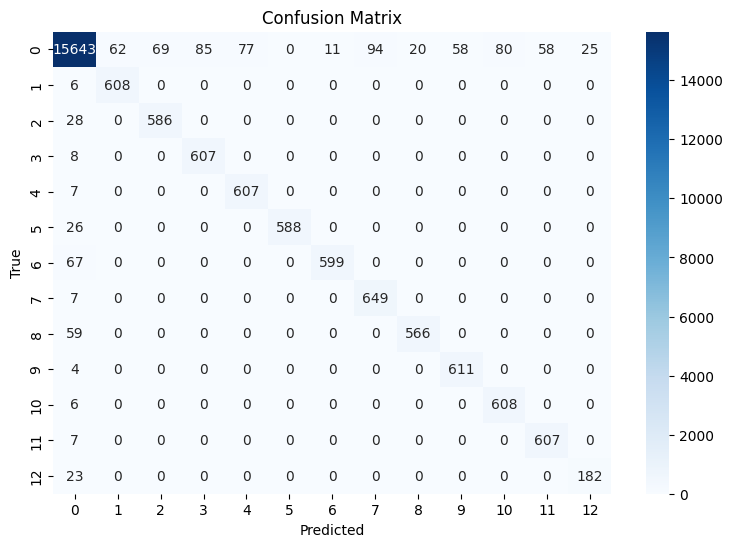

In [84]:
# Compute the confusion matrix
cm_rf4 = confusion_matrix(y_test4, y_pred_rf_test4)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_rf4, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [85]:
print("Random Forest classifier: Subject4")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_rftr4))
print("Best Validation Accuracy: {:.2f}".format(accuracy_rfval4))
print("Best Testing Accuracy: {:.2f}".format(accuracy_rftest4))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_rftr4))
print("Best Validation F1-score: {:.2f}".format(f1_rfval4))
print("Best Testing F1-score: {:.2f}".format(f1_rftest4))

Random Forest classifier: Subject4


Accuracy:
Best Training Accuracy: 1.00
Best Validation Accuracy: 0.96
Best Testing Accuracy: 0.96


F1-score:
Best Training F1-score: 1.00
Best Validation F1-score: 0.94
Best Testing F1-score: 0.94


### **Multilayer Perceptron (ANN)**

In [86]:
# Convert the target labels to categorical format
num_classes4 = len(np.unique(y4))
y_train_categorical4 = np_utils.to_categorical(y_train4, num_classes4)
y_val_categorical4 = np_utils.to_categorical(y_val4, num_classes4)
y_test_categorical4 = np_utils.to_categorical(y_test4, num_classes4)

# Create the MLP model
model4 = Sequential()
model4.add(Dense(64, input_dim=23, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(num_classes4, activation='softmax'))

# Compile the model
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model4.fit(X_train4, y_train_categorical4, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the validation set
val_loss4, val_accuracy4 = model4.evaluate(X_val4, y_val_categorical4, verbose=1)
print('Validation Loss:', val_loss4)
print('Validation Accuracy:', val_accuracy4)

# Evaluate the model on the testing set
test_loss4, test_accuracy4 = model4.evaluate(X_test4, y_test_categorical4, verbose=1)
print('Testing Loss:', test_loss4)
print('Testing Accuracy:', test_accuracy4)

Epoch 1/20
2335/2335 [==============================] - 5s 2ms/step - loss: 0.8297 - accuracy: 0.7776
Epoch 2/20
2335/2335 [==============================] - 5s 2ms/step - loss: 0.4294 - accuracy: 0.8337
Epoch 3/20
2335/2335 [==============================] - 4s 2ms/step - loss: 0.3641 - accuracy: 0.8541
Epoch 4/20
2335/2335 [==============================] - 4s 2ms/step - loss: 0.3292 - accuracy: 0.8631
Epoch 5/20
2335/2335 [==============================] - 5s 2ms/step - loss: 0.3068 - accuracy: 0.8730
Epoch 6/20
2335/2335 [==============================] - 5s 2ms/step - loss: 0.2942 - accuracy: 0.8774
Epoch 7/20
2335/2335 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.8820
Epoch 8/20
2335/2335 [==============================] - 5s 2ms/step - loss: 0.2740 - accuracy: 0.8844
Epoch 9/20
2335/2335 [==============================] - 5s 2ms/step - loss: 0.2681 - accuracy: 0.8873
Epoch 10/20
2335/2335 [==============================] - 4s 2ms/step - loss: 0.261

## **Subject 5**

**Creating dataframe for Subject5**

In [87]:
file_path = '/content/gdrive/MyDrive/MHEALTHDATASET/mHealth_subject5.log'

accel_chest_x = []
accel_chest_y = []
accel_chest_z = []
ecg_lead1 = []
ecg_lead2 = []
accel_ankle_x = []
accel_ankle_y = []
accel_ankle_z = []
gyro_ankle_x = []
gyro_ankle_y = []
gyro_ankle_z = []
magnet_ankle_x = []
magnet_ankle_y = []
magnet_ankle_z = []
accel_arm_x = []
accel_arm_y = []
accel_arm_z = []
gyro_arm_x = []
gyro_arm_y = []
gyro_arm_z = []
magnet_arm_x = []
magnet_arm_y = []
magnet_arm_z = []
label = []

with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        accel_chest_x.append(float(values[0]))
        accel_chest_y.append(float(values[1]))
        accel_chest_z.append(float(values[2]))
        ecg_lead1.append(float(values[3]))
        ecg_lead2.append(float(values[4]))
        accel_ankle_x.append(float(values[5]))
        accel_ankle_y.append(float(values[6]))
        accel_ankle_z.append(float(values[7]))
        gyro_ankle_x.append(float(values[8]))
        gyro_ankle_y.append(float(values[9]))
        gyro_ankle_z.append(float(values[10]))
        magnet_ankle_x.append(float(values[11]))
        magnet_ankle_y.append(float(values[12]))
        magnet_ankle_z.append(float(values[13]))
        accel_arm_x.append(float(values[14]))
        accel_arm_y.append(float(values[15]))
        accel_arm_z.append(float(values[16]))
        gyro_arm_x.append(float(values[17]))
        gyro_arm_y.append(float(values[18]))
        gyro_arm_z.append(float(values[19]))
        magnet_arm_x.append(float(values[20]))
        magnet_arm_y.append(float(values[21]))
        magnet_arm_z.append(float(values[22]))
        label.append(int(values[23]))

# Convert the lists to a pandas DataFrame

subject5 = pd.DataFrame({
    'accel_chest_x': accel_chest_x,
    'accel_chest_y': accel_chest_y,
    'accel_chest_z': accel_chest_z,
    'ecg_lead1': ecg_lead1,
    'ecg_lead2': ecg_lead2,
    'accel_ankle_x': accel_ankle_x,
    'accel_ankle_y': accel_ankle_y,
    'accel_ankle_z': accel_ankle_z,
    'gyro_ankle_x': gyro_ankle_x,
    'gyro_ankle_y': gyro_ankle_y,
    'gyro_ankle_z': gyro_ankle_z,
    'magnet_ankle_x': magnet_ankle_x,
    'magnet_ankle_y': magnet_ankle_y,
    'magnet_ankle_z': magnet_ankle_z,
    'accel_arm_x': accel_arm_x,
    'accel_arm_y': accel_arm_y,
    'accel_arm_z': accel_arm_z,
    'gyro_arm_x': gyro_arm_x,
    'gyro_arm_y': gyro_arm_y,
    'gyro_arm_z': gyro_arm_z,
    'magnet_arm_x': magnet_arm_x,
    'magnet_arm_y': magnet_arm_y,
    'magnet_arm_z': magnet_arm_z,
    'label': label
})


In [88]:
subject5.head()

,accel_chest_x,accel_chest_y,accel_chest_z,ecg_lead1,ecg_lead2,accel_ankle_x,accel_ankle_y,accel_ankle_z,gyro_ankle_x,gyro_ankle_y,...,accel_arm_x,accel_arm_y,accel_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,label
0,-8.3532,2.5062,-2.4060,-1.8210,-1.1889,0.39931,-9.4774,-2.1990,0.087199,-0.70544,...,-1.45960,-10.2560,-2.5961,0.38431,-0.86653,-0.65517,0.58703,22.7960,29.7480,0
1,-7.0730,2.1373,-2.6182,-2.0345,-1.3689,1.08420,-8.8761,-1.4746,0.087199,-0.70544,...,-1.61570,-9.6925,-2.2450,0.38431,-0.86653,-0.65517,-2.50700,18.5990,24.3130,0
2,-7.6434,2.3723,-2.4497,-2.2773,-1.4443,2.24080,-9.8723,-1.0962,0.087199,-0.70544,...,-1.63350,-8.9590,-1.8959,0.38431,-0.86653,-0.65517,-6.93790,6.3932,15.3210,0
3,-8.0995,2.4517,-2.7688,-2.4155,-1.4903,1.80160,-9.8628,-1.1314,0.063080,-0.71482,...,0.29969,-7.7175,-2.7505,0.38431,-0.86653,-0.65517,-12.24500,-3.6440,4.4847,0
4,-8.3307,2.3913,-3.0164,-2.1852,-1.3940,0.44444,-9.9628,-1.2333,0.063080,-0.71482,...,0.68226,-8.1037,-3.3739,0.40784,-0.88501,-0.66164,-17.37700,3.7383,-6.5221,0


In [89]:
X5 = subject5.iloc[:,:-1]
y5 = subject5.iloc[:,-1]

In [90]:
X_train_org5, X_test5, y_train_org5, y_test5 = train_test_split(X5, y5, stratify=y5, random_state = 55, test_size= 0.20)
X_train5, X_val5, y_train5, y_val5 = train_test_split(X_train_org5, y_train_org5, stratify=y_train_org5, random_state = 55, test_size= 0.20)

### **Random Forest Classifier**

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Building the model
rf5 = RandomForestClassifier(random_state = 123)

# Train the classifier
rf5.fit(X_train5, y_train5)

# Predicting on training data
y_pred_rf5 = rf5.predict(X_train5)

# Predicting on validation data
y_pred_rf15 = rf5.predict(X_val5)

# Predicting on testing data
y_pred_rf_test5 = rf5.predict(X_test5)

In [92]:
# Evaluation for training data

# Calculate performance metrics
accuracy_rftr5 = accuracy_score(y_train5, y_pred_rf5)
precision_rftr5= precision_score(y_train5, y_pred_rf5, average = 'macro')
recall_rftr5 = recall_score(y_train5, y_pred_rf5, average = 'macro')
f1_rftr5 = f1_score(y_train5, y_pred_rf5, average = 'macro')
classification_rep_rftr5 = classification_report(y_train5, y_pred_rf5, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_rftr5))
print("Training Precision: {:.2f}".format(precision_rftr5))
print("Training Recall: {:.2f}".format(recall_rftr5))
print("Training F1-score: {:.2f}".format(f1_rftr5))

print("Classification Report:\n", classification_rep_rftr5)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     54950
           1      1.000     1.000     1.000      1966
           2      1.000     1.000     1.000      1966
           3      1.000     1.000     1.000      1966
           4      1.000     1.000     1.000      1966
           5      1.000     1.000     1.000      1966
           6      1.000     1.000     1.000      1770
           7      1.000     1.000     1.000      1835
           8      1.000     1.000     1.000      1737
           9      1.000     1.000     1.000      1966
          10      1.000     1.000     1.000      1967
          11      1.000     1.000     1.000      1966
          12      1.000     1.000     1.000       655

    accuracy                          1.000     76676
   macro avg      1.000     1.000     1.000     76676
weighted avg   

In [93]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_rfval5 = accuracy_score(y_val5, y_pred_rf15)
precision_rfval5= precision_score(y_val5, y_pred_rf15, average = 'macro')
recall_rfval5 = recall_score(y_val5, y_pred_rf15, average = 'macro')
f1_rfval5 = f1_score(y_val5, y_pred_rf15, average = 'macro')
classification_rep_rfval5 = classification_report(y_val5, y_pred_rf15, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_rfval5))
print("Validation Precision: {:.2f}".format(precision_rfval5))
print("Validation Recall: {:.2f}".format(recall_rfval5))
print("Validation F1-score: {:.2f}".format(f1_rfval5))

print("Classification Report:\n", classification_rep_rfval5)

Validation Accuracy: 0.96
Validation Precision: 0.91
Validation Recall: 0.94
Validation F1-score: 0.92
Classification Report:
               precision    recall  f1-score   support

           0      0.979     0.959     0.969     13738
           1      0.846     0.970     0.903       492
           2      0.803     0.972     0.879       492
           3      0.924     0.969     0.946       491
           4      0.895     0.829     0.861       492
           5      0.998     0.892     0.942       492
           6      0.939     0.971     0.954       442
           7      0.926     0.980     0.952       459
           8      0.970     0.982     0.976       434
           9      0.911     0.998     0.952       491
          10      0.845     0.988     0.911       491
          11      0.906     0.984     0.943       492
          12      0.950     0.689     0.799       164

    accuracy                          0.956     19170
   macro avg      0.915     0.937     0.922     19170
weighte

In [94]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_rftest5 = accuracy_score(y_test5, y_pred_rf_test5)
precision_rftest5= precision_score(y_test5, y_pred_rf_test5, average = 'macro')
recall_rftest5 = recall_score(y_test5, y_pred_rf_test5, average = 'macro')
f1_rftest5 = f1_score(y_test5, y_pred_rf_test5, average = 'macro')
classification_rep_rftest5 = classification_report(y_test5, y_pred_rf_test5, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_rftest5))
print("Testing Precision: {:.2f}".format(precision_rftest5))
print("Testing Recall: {:.2f}".format(recall_rftest5))
print("Testing F1-score: {:.2f}".format(f1_rftest5))

print("Classification Report:\n", classification_rep_rftest5)

Testing Accuracy: 0.96
Testing Precision: 0.91
Testing Recall: 0.93
Testing F1-score: 0.92
Classification Report:
               precision    recall  f1-score   support

           0      0.978     0.959     0.969     17173
           1      0.838     0.979     0.903       614
           2      0.828     0.959     0.889       614
           3      0.922     0.980     0.950       615
           4      0.868     0.805     0.835       614
           5      0.995     0.907     0.949       614
           6      0.929     0.967     0.948       553
           7      0.930     0.970     0.950       574
           8      0.969     0.969     0.969       543
           9      0.924     0.995     0.958       615
          10      0.863     0.987     0.921       614
          11      0.893     0.979     0.934       614
          12      0.920     0.673     0.777       205

    accuracy                          0.955     23962
   macro avg      0.912     0.933     0.919     23962
weighted avg      0

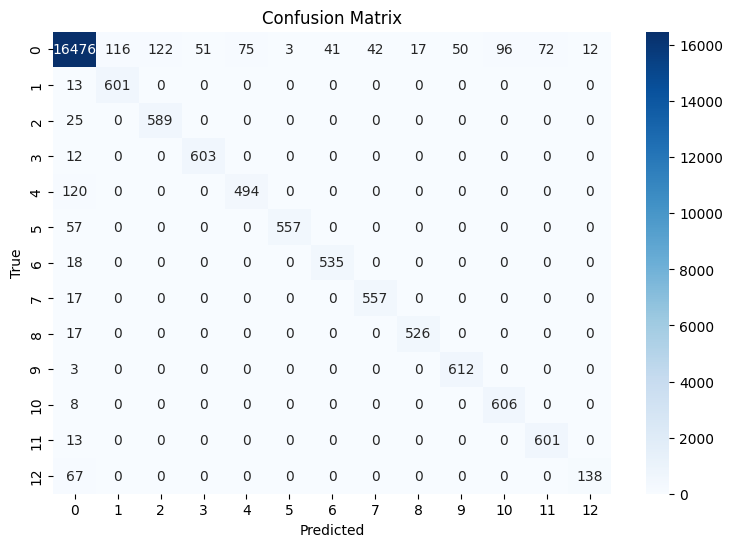

In [95]:
# Compute the confusion matrix
cm_rf5 = confusion_matrix(y_test5, y_pred_rf_test5)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_rf5, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [96]:
print("Random Forest classifier: Subject5")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_rftr5))
print("Best Validation Accuracy: {:.2f}".format(accuracy_rfval5))
print("Best Testing Accuracy: {:.2f}".format(accuracy_rftest5))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_rftr5))
print("Best Validation F1-score: {:.2f}".format(f1_rfval5))
print("Best Testing F1-score: {:.2f}".format(f1_rftest5))

Random Forest classifier: Subject5


Accuracy:
Best Training Accuracy: 1.00
Best Validation Accuracy: 0.96
Best Testing Accuracy: 0.96


F1-score:
Best Training F1-score: 1.00
Best Validation F1-score: 0.92
Best Testing F1-score: 0.92


### **Multilayer Perceptron (ANN)**

In [97]:
# Convert the target labels to categorical format
num_classes5 = len(np.unique(y5))
y_train_categorical5 = np_utils.to_categorical(y_train5, num_classes5)
y_val_categorical5 = np_utils.to_categorical(y_val5, num_classes5)
y_test_categorical5 = np_utils.to_categorical(y_test5, num_classes5)

# Create the MLP model
model5 = Sequential()
model5.add(Dense(64, input_dim=23, activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(num_classes5, activation='softmax'))

# Compile the model
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model5.fit(X_train5, y_train_categorical5, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the validation set
val_loss5, val_accuracy5 = model5.evaluate(X_val5, y_val_categorical5, verbose=1)
print('Validation Loss:', val_loss5)
print('Validation Accuracy:', val_accuracy5)

# Evaluate the model on the testing set
test_loss5, test_accuracy5 = model5.evaluate(X_test5, y_test_categorical5, verbose=1)
print('Testing Loss:', test_loss5)
print('Testing Accuracy:', test_accuracy5)

Epoch 1/20
2397/2397 [==============================] - 7s 2ms/step - loss: 0.7606 - accuracy: 0.7786
Epoch 2/20
2397/2397 [==============================] - 6s 2ms/step - loss: 0.4398 - accuracy: 0.8303
Epoch 3/20
2397/2397 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8495
Epoch 4/20
2397/2397 [==============================] - 6s 2ms/step - loss: 0.3492 - accuracy: 0.8583
Epoch 5/20
2397/2397 [==============================] - 4s 2ms/step - loss: 0.3261 - accuracy: 0.8663
Epoch 6/20
2397/2397 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8711
Epoch 7/20
2397/2397 [==============================] - 6s 2ms/step - loss: 0.2995 - accuracy: 0.8753
Epoch 8/20
2397/2397 [==============================] - 4s 2ms/step - loss: 0.2906 - accuracy: 0.8774
Epoch 9/20
2397/2397 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.8806
Epoch 10/20
2397/2397 [==============================] - 11s 5ms/step - loss: 0.27

## **Subject 6**

**Creating dataframe for Subject6**

In [98]:
file_path = '/content/gdrive/MyDrive/MHEALTHDATASET/mHealth_subject6.log'

accel_chest_x = []
accel_chest_y = []
accel_chest_z = []
ecg_lead1 = []
ecg_lead2 = []
accel_ankle_x = []
accel_ankle_y = []
accel_ankle_z = []
gyro_ankle_x = []
gyro_ankle_y = []
gyro_ankle_z = []
magnet_ankle_x = []
magnet_ankle_y = []
magnet_ankle_z = []
accel_arm_x = []
accel_arm_y = []
accel_arm_z = []
gyro_arm_x = []
gyro_arm_y = []
gyro_arm_z = []
magnet_arm_x = []
magnet_arm_y = []
magnet_arm_z = []
label = []

with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        accel_chest_x.append(float(values[0]))
        accel_chest_y.append(float(values[1]))
        accel_chest_z.append(float(values[2]))
        ecg_lead1.append(float(values[3]))
        ecg_lead2.append(float(values[4]))
        accel_ankle_x.append(float(values[5]))
        accel_ankle_y.append(float(values[6]))
        accel_ankle_z.append(float(values[7]))
        gyro_ankle_x.append(float(values[8]))
        gyro_ankle_y.append(float(values[9]))
        gyro_ankle_z.append(float(values[10]))
        magnet_ankle_x.append(float(values[11]))
        magnet_ankle_y.append(float(values[12]))
        magnet_ankle_z.append(float(values[13]))
        accel_arm_x.append(float(values[14]))
        accel_arm_y.append(float(values[15]))
        accel_arm_z.append(float(values[16]))
        gyro_arm_x.append(float(values[17]))
        gyro_arm_y.append(float(values[18]))
        gyro_arm_z.append(float(values[19]))
        magnet_arm_x.append(float(values[20]))
        magnet_arm_y.append(float(values[21]))
        magnet_arm_z.append(float(values[22]))
        label.append(int(values[23]))

# Convert the lists to a pandas DataFrame

subject6 = pd.DataFrame({
    'accel_chest_x': accel_chest_x,
    'accel_chest_y': accel_chest_y,
    'accel_chest_z': accel_chest_z,
    'ecg_lead1': ecg_lead1,
    'ecg_lead2': ecg_lead2,
    'accel_ankle_x': accel_ankle_x,
    'accel_ankle_y': accel_ankle_y,
    'accel_ankle_z': accel_ankle_z,
    'gyro_ankle_x': gyro_ankle_x,
    'gyro_ankle_y': gyro_ankle_y,
    'gyro_ankle_z': gyro_ankle_z,
    'magnet_ankle_x': magnet_ankle_x,
    'magnet_ankle_y': magnet_ankle_y,
    'magnet_ankle_z': magnet_ankle_z,
    'accel_arm_x': accel_arm_x,
    'accel_arm_y': accel_arm_y,
    'accel_arm_z': accel_arm_z,
    'gyro_arm_x': gyro_arm_x,
    'gyro_arm_y': gyro_arm_y,
    'gyro_arm_z': gyro_arm_z,
    'magnet_arm_x': magnet_arm_x,
    'magnet_arm_y': magnet_arm_y,
    'magnet_arm_z': magnet_arm_z,
    'label': label
})


In [99]:
subject6.head()

,accel_chest_x,accel_chest_y,accel_chest_z,ecg_lead1,ecg_lead2,accel_ankle_x,accel_ankle_y,accel_ankle_z,gyro_ankle_x,gyro_ankle_y,...,accel_arm_x,accel_arm_y,accel_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,label
0,-9.1319,2.0514,-0.13116,0.083726,-0.041863,-0.77206,-9.4262,-4.9999,0.25788,-0.90807,...,-12.1360,-1.9945,0.54611,-0.59020,0.71663,0.31466,109.190,-32.688,-92.435,0
1,-8.6028,1.8569,-0.34867,0.171640,-0.008373,-4.59760,-9.2246,-2.6530,0.31354,-0.87992,...,-9.2323,-1.5408,-1.07700,-0.59020,0.71663,0.31466,105.760,-52.213,-88.337,0
2,-8.4785,1.7010,-0.80480,0.263740,0.058608,-5.00190,-8.9910,-3.0621,0.31354,-0.87992,...,-6.5812,-1.7471,-2.71240,-0.70784,0.64271,0.19612,101.540,-43.508,-93.202,0
3,-8.0197,1.9970,-0.65185,0.364210,0.054422,-2.74880,-9.2327,-2.4787,0.31354,-0.87992,...,-5.0034,-1.7464,-3.63940,-0.70784,0.64271,0.19612,93.368,-16.875,-105.910,0
4,-7.3350,1.5970,-0.37206,0.477240,0.133960,-2.98880,-8.9681,-2.7491,0.26902,-0.87430,...,-4.1554,-1.8952,-3.52180,-0.70784,0.64271,0.19612,81.305,15.553,-123.800,0


In [100]:
X6 = subject6.iloc[:,:-1]
y6 = subject6.iloc[:,-1]

In [101]:
X_train_org6, X_test6, y_train_org6, y_test6 = train_test_split(X6, y6, stratify=y6, random_state = 55, test_size= 0.20)
X_train6, X_val6, y_train6, y_val6 = train_test_split(X_train_org6, y_train_org6, stratify=y_train_org6, random_state = 55, test_size= 0.20)

### **Random Forest Classifier**

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Building the model
rf6 = RandomForestClassifier(random_state = 123)

# Train the classifier
rf6.fit(X_train6, y_train6)

# Predicting on training data
y_pred_rf6 = rf6.predict(X_train6)

# Predicting on validation data
y_pred_rf16 = rf6.predict(X_val6)

# Predicting on testing data
y_pred_rf_test6 = rf6.predict(X_test6)

In [103]:
# Evaluation for training data

# Calculate performance metrics
accuracy_rftr6 = accuracy_score(y_train6, y_pred_rf6)
precision_rftr6= precision_score(y_train6, y_pred_rf6, average = 'macro')
recall_rftr6 = recall_score(y_train6, y_pred_rf6, average = 'macro')
f1_rftr6 = f1_score(y_train6, y_pred_rf6, average = 'macro')
classification_rep_rftr6 = classification_report(y_train6, y_pred_rf6, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_rftr6))
print("Training Precision: {:.2f}".format(precision_rftr6))
print("Training Recall: {:.2f}".format(recall_rftr6))
print("Training F1-score: {:.2f}".format(f1_rftr6))

print("Classification Report:\n", classification_rep_rftr6)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     42303
           1      1.000     1.000     1.000      1966
           2      1.000     1.000     1.000      1966
           3      1.000     1.000     1.000      1966
           4      0.999     1.000     1.000      1966
           5      1.000     1.000     1.000      1966
           6      1.000     1.000     1.000      1410
           7      1.000     1.000     1.000      1343
           8      1.000     1.000     1.000      1475
           9      1.000     1.000     1.000      1966
          10      1.000     1.000     1.000      1966
          11      1.000     1.000     1.000      1966
          12      1.000     1.000     1.000       655

    accuracy                          1.000     62914
   macro avg      1.000     1.000     1.000     62914
weighted avg   

In [104]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_rfval6 = accuracy_score(y_val6, y_pred_rf16)
precision_rfval6= precision_score(y_val6, y_pred_rf16, average = 'macro')
recall_rfval6 = recall_score(y_val6, y_pred_rf16, average = 'macro')
f1_rfval6 = f1_score(y_val6, y_pred_rf16, average = 'macro')
classification_rep_rfval6 = classification_report(y_val6, y_pred_rf16, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_rfval6))
print("Validation Precision: {:.2f}".format(precision_rfval6))
print("Validation Recall: {:.2f}".format(recall_rfval6))
print("Validation F1-score: {:.2f}".format(f1_rfval6))

print("Classification Report:\n", classification_rep_rfval6)

Validation Accuracy: 0.96
Validation Precision: 0.93
Validation Recall: 0.98
Validation F1-score: 0.95
Classification Report:
               precision    recall  f1-score   support

           0      0.990     0.956     0.973     10576
           1      0.903     0.967     0.934       491
           2      0.890     0.988     0.936       492
           3      0.901     0.988     0.943       491
           4      0.958     0.978     0.968       492
           5      0.998     0.937     0.966       492
           6      0.954     0.997     0.975       352
           7      0.951     0.985     0.968       336
           8      0.955     0.984     0.969       368
           9      0.886     0.994     0.937       491
          10      0.896     0.996     0.943       492
          11      0.835     1.000     0.910       492
          12      0.915     0.921     0.918       164

    accuracy                          0.964     15729
   macro avg      0.926     0.976     0.949     15729
weighte

In [105]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_rftest6 = accuracy_score(y_test6, y_pred_rf_test6)
precision_rftest6= precision_score(y_test6, y_pred_rf_test6, average = 'macro')
recall_rftest6 = recall_score(y_test6, y_pred_rf_test6, average = 'macro')
f1_rftest6 = f1_score(y_test6, y_pred_rf_test6, average = 'macro')
classification_rep_rftest6 = classification_report(y_test6, y_pred_rf_test6, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_rftest6))
print("Testing Precision: {:.2f}".format(precision_rftest6))
print("Testing Recall: {:.2f}".format(recall_rftest6))
print("Testing F1-score: {:.2f}".format(f1_rftest6))

print("Classification Report:\n", classification_rep_rftest6)

Testing Accuracy: 0.96
Testing Precision: 0.93
Testing Recall: 0.97
Testing F1-score: 0.95
Classification Report:
               precision    recall  f1-score   support

           0      0.989     0.957     0.973     13220
           1      0.906     0.971     0.937       615
           2      0.895     0.972     0.932       614
           3      0.915     0.993     0.952       615
           4      0.921     0.984     0.951       614
           5      0.995     0.943     0.968       614
           6      0.960     0.991     0.975       440
           7      0.947     0.983     0.965       420
           8      0.958     0.978     0.968       461
           9      0.878     0.971     0.922       615
          10      0.904     1.000     0.950       614
          11      0.863     0.997     0.925       614
          12      0.900     0.922     0.911       205

    accuracy                          0.964     19661
   macro avg      0.925     0.974     0.948     19661
weighted avg      0

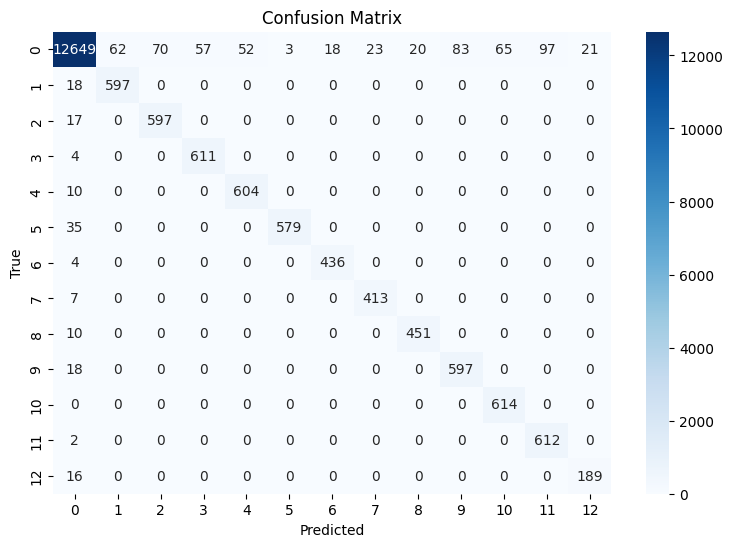

In [106]:
# Compute the confusion matrix
cm_rf6 = confusion_matrix(y_test6, y_pred_rf_test6)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_rf6, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [107]:
print("Random Forest classifier: Subject6")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_rftr6))
print("Best Validation Accuracy: {:.2f}".format(accuracy_rfval6))
print("Best Testing Accuracy: {:.2f}".format(accuracy_rftest6))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_rftr6))
print("Best Validation F1-score: {:.2f}".format(f1_rfval6))
print("Best Testing F1-score: {:.2f}".format(f1_rftest6))

Random Forest classifier: Subject6


Accuracy:
Best Training Accuracy: 1.00
Best Validation Accuracy: 0.96
Best Testing Accuracy: 0.96


F1-score:
Best Training F1-score: 1.00
Best Validation F1-score: 0.95
Best Testing F1-score: 0.95


### **Multilayer Perceptron (ANN)**

In [108]:
# Convert the target labels to categorical format
num_classes6 = len(np.unique(y6))
y_train_categorical6 = np_utils.to_categorical(y_train6, num_classes6)
y_val_categorical6 = np_utils.to_categorical(y_val6, num_classes6)
y_test_categorical6 = np_utils.to_categorical(y_test6, num_classes6)

# Create the MLP model
model6 = Sequential()
model6.add(Dense(64, input_dim=23, activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(num_classes6, activation='softmax'))

# Compile the model
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model6.fit(X_train6, y_train_categorical6, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the validation set
val_loss6, val_accuracy6 = model6.evaluate(X_val6, y_val_categorical6, verbose=1)
print('Validation Loss:', val_loss6)
print('Validation Accuracy:', val_accuracy6)

# Evaluate the model on the testing set
test_loss6, test_accuracy6 = model6.evaluate(X_test6, y_test_categorical6, verbose=1)
print('Testing Loss:', test_loss6)
print('Testing Accuracy:', test_accuracy6)

Epoch 1/20
1967/1967 [==============================] - 5s 2ms/step - loss: 0.9416 - accuracy: 0.7533
Epoch 2/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.4397 - accuracy: 0.8385
Epoch 3/20
1967/1967 [==============================] - 5s 2ms/step - loss: 0.3557 - accuracy: 0.8645
Epoch 4/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.3123 - accuracy: 0.8814
Epoch 5/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.8901
Epoch 6/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.8968
Epoch 7/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.2519 - accuracy: 0.9028
Epoch 8/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.2413 - accuracy: 0.9066
Epoch 9/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.2345 - accuracy: 0.9096
Epoch 10/20
1967/1967 [==============================] - 5s 3ms/step - loss: 0.227

## **Subject 7**

**Creating dataframe for Subject7**

In [109]:
file_path = '/content/gdrive/MyDrive/MHEALTHDATASET/mHealth_subject7.log'

accel_chest_x = []
accel_chest_y = []
accel_chest_z = []
ecg_lead1 = []
ecg_lead2 = []
accel_ankle_x = []
accel_ankle_y = []
accel_ankle_z = []
gyro_ankle_x = []
gyro_ankle_y = []
gyro_ankle_z = []
magnet_ankle_x = []
magnet_ankle_y = []
magnet_ankle_z = []
accel_arm_x = []
accel_arm_y = []
accel_arm_z = []
gyro_arm_x = []
gyro_arm_y = []
gyro_arm_z = []
magnet_arm_x = []
magnet_arm_y = []
magnet_arm_z = []
label = []

with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        accel_chest_x.append(float(values[0]))
        accel_chest_y.append(float(values[1]))
        accel_chest_z.append(float(values[2]))
        ecg_lead1.append(float(values[3]))
        ecg_lead2.append(float(values[4]))
        accel_ankle_x.append(float(values[5]))
        accel_ankle_y.append(float(values[6]))
        accel_ankle_z.append(float(values[7]))
        gyro_ankle_x.append(float(values[8]))
        gyro_ankle_y.append(float(values[9]))
        gyro_ankle_z.append(float(values[10]))
        magnet_ankle_x.append(float(values[11]))
        magnet_ankle_y.append(float(values[12]))
        magnet_ankle_z.append(float(values[13]))
        accel_arm_x.append(float(values[14]))
        accel_arm_y.append(float(values[15]))
        accel_arm_z.append(float(values[16]))
        gyro_arm_x.append(float(values[17]))
        gyro_arm_y.append(float(values[18]))
        gyro_arm_z.append(float(values[19]))
        magnet_arm_x.append(float(values[20]))
        magnet_arm_y.append(float(values[21]))
        magnet_arm_z.append(float(values[22]))
        label.append(int(values[23]))

# Convert the lists to a pandas DataFrame

subject7 = pd.DataFrame({
    'accel_chest_x': accel_chest_x,
    'accel_chest_y': accel_chest_y,
    'accel_chest_z': accel_chest_z,
    'ecg_lead1': ecg_lead1,
    'ecg_lead2': ecg_lead2,
    'accel_ankle_x': accel_ankle_x,
    'accel_ankle_y': accel_ankle_y,
    'accel_ankle_z': accel_ankle_z,
    'gyro_ankle_x': gyro_ankle_x,
    'gyro_ankle_y': gyro_ankle_y,
    'gyro_ankle_z': gyro_ankle_z,
    'magnet_ankle_x': magnet_ankle_x,
    'magnet_ankle_y': magnet_ankle_y,
    'magnet_ankle_z': magnet_ankle_z,
    'accel_arm_x': accel_arm_x,
    'accel_arm_y': accel_arm_y,
    'accel_arm_z': accel_arm_z,
    'gyro_arm_x': gyro_arm_x,
    'gyro_arm_y': gyro_arm_y,
    'gyro_arm_z': gyro_arm_z,
    'magnet_arm_x': magnet_arm_x,
    'magnet_arm_y': magnet_arm_y,
    'magnet_arm_z': magnet_arm_z,
    'label': label
})


In [110]:
subject7.head()

,accel_chest_x,accel_chest_y,accel_chest_z,ecg_lead1,ecg_lead2,accel_ankle_x,accel_ankle_y,accel_ankle_z,gyro_ankle_x,gyro_ankle_y,...,accel_arm_x,accel_arm_y,accel_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,label
0,-9.5409,-1.2392,-0.77468,-0.083726,-0.054422,2.3448,-9.6597,1.3530,0.78108,-0.52158,...,-7.0806,-6.6875,2.2490,-0.64902,-0.13758,0.82328,-1.6286,-1.2796,-2.5469,0
1,-9.5641,-1.5915,-0.92218,-0.154890,-0.121400,2.0888,-9.4906,1.4318,0.77922,-0.52533,...,-6.8389,-6.5352,2.4753,-0.64902,-0.13758,0.82328,-1.2749,-1.8203,-1.8124,0
2,-9.5849,-1.5612,-0.94051,-0.251180,-0.175820,2.1386,-9.4919,1.3072,0.77922,-0.52533,...,-6.6737,-6.6865,2.3532,-0.64902,-0.13758,0.82328,-1.4563,-1.9999,-1.8142,0
3,-9.7097,-1.3823,-0.77703,-0.263740,-0.184200,2.2127,-9.6292,1.4365,0.77922,-0.52533,...,-6.7865,-6.4962,2.3835,-0.63922,-0.14579,0.83621,-1.4509,-1.4592,-2.1805,0
4,-9.7578,-1.5030,-0.87211,-0.385140,-0.246990,2.2195,-9.6426,1.0817,0.77922,-0.52533,...,-6.6627,-6.4775,2.2490,-0.63922,-0.14579,0.83621,-1.0881,-1.0890,-1.0939,0


In [111]:
X7 = subject7.iloc[:,:-1]
y7 = subject7.iloc[:,-1]

In [112]:
X_train_org7, X_test7, y_train_org7, y_test7 = train_test_split(X7, y7, stratify=y7, random_state = 55, test_size= 0.20)
X_train7, X_val7, y_train7, y_val7 = train_test_split(X_train_org7, y_train_org7, stratify=y_train_org7, random_state = 55, test_size= 0.20)

### **Random Forest Classifier**

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Building the model
rf7 = RandomForestClassifier(random_state = 123)

# Train the classifier
rf7.fit(X_train7, y_train7)

# Predicting on training data
y_pred_rf7 = rf7.predict(X_train7)

# Predicting on validation data
y_pred_rf17 = rf7.predict(X_val7)

# Predicting on testing data
y_pred_rf_test7 = rf7.predict(X_test7)

In [114]:
# Evaluation for training data

# Calculate performance metrics
accuracy_rftr7 = accuracy_score(y_train7, y_pred_rf7)
precision_rftr7= precision_score(y_train7, y_pred_rf7, average = 'macro')
recall_rftr7 = recall_score(y_train7, y_pred_rf7, average = 'macro')
f1_rftr7 = f1_score(y_train7, y_pred_rf7, average = 'macro')
classification_rep_rftr7 = classification_report(y_train7, y_pred_rf7, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_rftr7))
print("Training Precision: {:.2f}".format(precision_rftr7))
print("Training Recall: {:.2f}".format(recall_rftr7))
print("Training F1-score: {:.2f}".format(f1_rftr7))

print("Classification Report:\n", classification_rep_rftr7)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     44925
           1      1.000     1.000     1.000      1966
           2      1.000     1.000     1.000      1966
           3      1.000     1.000     1.000      1966
           4      1.000     1.000     1.000      1966
           5      1.000     1.000     1.000      1966
           6      1.000     1.000     1.000      1966
           7      1.000     1.000     1.000      1770
           8      1.000     1.000     1.000      1802
           9      1.000     1.000     1.000      1966
          10      1.000     1.000     1.000      1966
          11      1.000     1.000     1.000      1966
          12      1.000     1.000     1.000       655

    accuracy                          1.000     66846
   macro avg      1.000     1.000     1.000     66846
weighted avg   

In [115]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_rfval7 = accuracy_score(y_val7, y_pred_rf17)
precision_rfval7= precision_score(y_val7, y_pred_rf17, average = 'macro')
recall_rfval7 = recall_score(y_val7, y_pred_rf17, average = 'macro')
f1_rfval7 = f1_score(y_val7, y_pred_rf17, average = 'macro')
classification_rep_rfval7 = classification_report(y_val7, y_pred_rf17, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_rfval7))
print("Validation Precision: {:.2f}".format(precision_rfval7))
print("Validation Recall: {:.2f}".format(recall_rfval7))
print("Validation F1-score: {:.2f}".format(f1_rfval7))

print("Classification Report:\n", classification_rep_rfval7)

Validation Accuracy: 0.96
Validation Precision: 0.92
Validation Recall: 0.94
Validation F1-score: 0.93
Classification Report:
               precision    recall  f1-score   support

           0      0.982     0.952     0.967     11231
           1      0.826     0.959     0.888       491
           2      0.813     0.955     0.879       492
           3      0.944     0.986     0.964       492
           4      0.920     0.961     0.940       492
           5      0.973     0.951     0.962       492
           6      0.925     0.982     0.953       491
           7      0.913     0.998     0.954       442
           8      0.959     0.982     0.970       451
           9      0.924     0.994     0.958       491
          10      0.882     0.988     0.932       491
          11      0.935     0.992     0.963       492
          12      0.913     0.579     0.709       164

    accuracy                          0.956     16712
   macro avg      0.916     0.945     0.926     16712
weighte

In [116]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_rftest7 = accuracy_score(y_test7, y_pred_rf_test7)
precision_rftest7= precision_score(y_test7, y_pred_rf_test7, average = 'macro')
recall_rftest7 = recall_score(y_test7, y_pred_rf_test7, average = 'macro')
f1_rftest7 = f1_score(y_test7, y_pred_rf_test7, average = 'macro')
classification_rep_rftest7 = classification_report(y_test7, y_pred_rf_test7, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_rftest7))
print("Testing Precision: {:.2f}".format(precision_rftest7))
print("Testing Recall: {:.2f}".format(recall_rftest7))
print("Testing F1-score: {:.2f}".format(f1_rftest7))

print("Classification Report:\n", classification_rep_rftest7)

Testing Accuracy: 0.95
Testing Precision: 0.91
Testing Recall: 0.94
Testing F1-score: 0.92
Classification Report:
               precision    recall  f1-score   support

           0      0.979     0.951     0.965     14039
           1      0.844     0.974     0.904       615
           2      0.853     0.901     0.876       614
           3      0.911     0.979     0.943       614
           4      0.911     0.964     0.937       614
           5      0.978     0.940     0.958       614
           6      0.935     0.980     0.957       615
           7      0.903     0.991     0.945       553
           8      0.960     0.989     0.975       563
           9      0.916     0.989     0.951       615
          10      0.889     0.972     0.929       615
          11      0.890     0.985     0.935       614
          12      0.863     0.585     0.698       205

    accuracy                          0.953     20890
   macro avg      0.910     0.939     0.921     20890
weighted avg      0

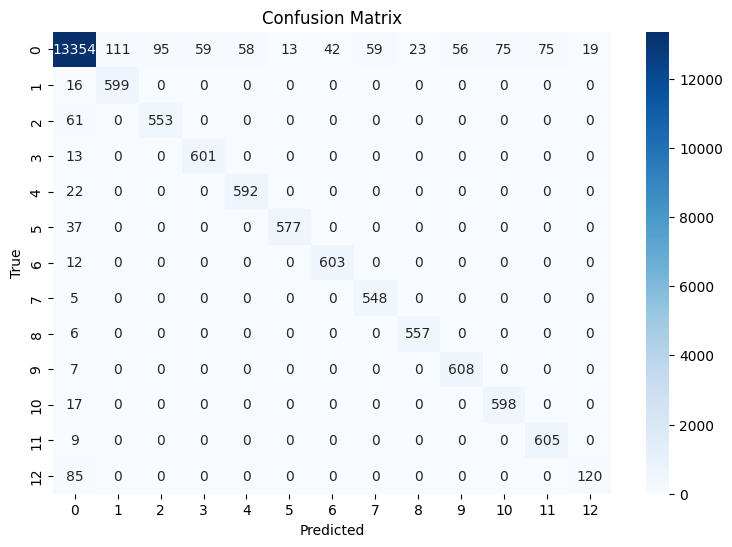

In [117]:
# Compute the confusion matrix
cm_rf7 = confusion_matrix(y_test7, y_pred_rf_test7)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_rf7, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [118]:
print("Random Forest classifier: Subject7")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_rftr7))
print("Best Validation Accuracy: {:.2f}".format(accuracy_rfval7))
print("Best Testing Accuracy: {:.2f}".format(accuracy_rftest7))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_rftr7))
print("Best Validation F1-score: {:.2f}".format(f1_rfval7))
print("Best Testing F1-score: {:.2f}".format(f1_rftest7))

Random Forest classifier: Subject7


Accuracy:
Best Training Accuracy: 1.00
Best Validation Accuracy: 0.96
Best Testing Accuracy: 0.95


F1-score:
Best Training F1-score: 1.00
Best Validation F1-score: 0.93
Best Testing F1-score: 0.92


### **Multilayer Perceptron (ANN)**

In [119]:
# Convert the target labels to categorical format
num_classes7 = len(np.unique(y7))
y_train_categorical7 = np_utils.to_categorical(y_train7, num_classes7)
y_val_categorical7 = np_utils.to_categorical(y_val7, num_classes7)
y_test_categorical7 = np_utils.to_categorical(y_test7, num_classes7)

# Create the MLP model
model7 = Sequential()
model7.add(Dense(64, input_dim=23, activation='relu'))
model7.add(Dense(32, activation='relu'))
model7.add(Dense(num_classes7, activation='softmax'))

# Compile the model
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model7.fit(X_train7, y_train_categorical7, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the validation set
val_loss7, val_accuracy7 = model7.evaluate(X_val7, y_val_categorical7, verbose=1)
print('Validation Loss:', val_loss7)
print('Validation Accuracy:', val_accuracy7)

# Evaluate the model on the testing set
test_loss7, test_accuracy7 = model7.evaluate(X_test7, y_test_categorical7, verbose=1)
print('Testing Loss:', test_loss7)
print('Testing Accuracy:', test_accuracy7)

Epoch 1/20
2089/2089 [==============================] - 5s 2ms/step - loss: 0.9137 - accuracy: 0.7520
Epoch 2/20
2089/2089 [==============================] - 5s 2ms/step - loss: 0.4405 - accuracy: 0.8288
Epoch 3/20
2089/2089 [==============================] - 4s 2ms/step - loss: 0.3700 - accuracy: 0.8499
Epoch 4/20
2089/2089 [==============================] - 4s 2ms/step - loss: 0.3389 - accuracy: 0.8595
Epoch 5/20
2089/2089 [==============================] - 5s 2ms/step - loss: 0.3169 - accuracy: 0.8669
Epoch 6/20
2089/2089 [==============================] - 4s 2ms/step - loss: 0.3026 - accuracy: 0.8699
Epoch 7/20
2089/2089 [==============================] - 4s 2ms/step - loss: 0.2918 - accuracy: 0.8737
Epoch 8/20
2089/2089 [==============================] - 5s 2ms/step - loss: 0.2841 - accuracy: 0.8778
Epoch 9/20
2089/2089 [==============================] - 5s 2ms/step - loss: 0.2770 - accuracy: 0.8795
Epoch 10/20
2089/2089 [==============================] - 4s 2ms/step - loss: 0.270

## **Subject 8**

**Creating dataframe for Subject8**

In [120]:
file_path = '/content/gdrive/MyDrive/MHEALTHDATASET/mHealth_subject8.log'

accel_chest_x = []
accel_chest_y = []
accel_chest_z = []
ecg_lead1 = []
ecg_lead2 = []
accel_ankle_x = []
accel_ankle_y = []
accel_ankle_z = []
gyro_ankle_x = []
gyro_ankle_y = []
gyro_ankle_z = []
magnet_ankle_x = []
magnet_ankle_y = []
magnet_ankle_z = []
accel_arm_x = []
accel_arm_y = []
accel_arm_z = []
gyro_arm_x = []
gyro_arm_y = []
gyro_arm_z = []
magnet_arm_x = []
magnet_arm_y = []
magnet_arm_z = []
label = []

with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        accel_chest_x.append(float(values[0]))
        accel_chest_y.append(float(values[1]))
        accel_chest_z.append(float(values[2]))
        ecg_lead1.append(float(values[3]))
        ecg_lead2.append(float(values[4]))
        accel_ankle_x.append(float(values[5]))
        accel_ankle_y.append(float(values[6]))
        accel_ankle_z.append(float(values[7]))
        gyro_ankle_x.append(float(values[8]))
        gyro_ankle_y.append(float(values[9]))
        gyro_ankle_z.append(float(values[10]))
        magnet_ankle_x.append(float(values[11]))
        magnet_ankle_y.append(float(values[12]))
        magnet_ankle_z.append(float(values[13]))
        accel_arm_x.append(float(values[14]))
        accel_arm_y.append(float(values[15]))
        accel_arm_z.append(float(values[16]))
        gyro_arm_x.append(float(values[17]))
        gyro_arm_y.append(float(values[18]))
        gyro_arm_z.append(float(values[19]))
        magnet_arm_x.append(float(values[20]))
        magnet_arm_y.append(float(values[21]))
        magnet_arm_z.append(float(values[22]))
        label.append(int(values[23]))

# Convert the lists to a pandas DataFrame

subject8 = pd.DataFrame({
    'accel_chest_x': accel_chest_x,
    'accel_chest_y': accel_chest_y,
    'accel_chest_z': accel_chest_z,
    'ecg_lead1': ecg_lead1,
    'ecg_lead2': ecg_lead2,
    'accel_ankle_x': accel_ankle_x,
    'accel_ankle_y': accel_ankle_y,
    'accel_ankle_z': accel_ankle_z,
    'gyro_ankle_x': gyro_ankle_x,
    'gyro_ankle_y': gyro_ankle_y,
    'gyro_ankle_z': gyro_ankle_z,
    'magnet_ankle_x': magnet_ankle_x,
    'magnet_ankle_y': magnet_ankle_y,
    'magnet_ankle_z': magnet_ankle_z,
    'accel_arm_x': accel_arm_x,
    'accel_arm_y': accel_arm_y,
    'accel_arm_z': accel_arm_z,
    'gyro_arm_x': gyro_arm_x,
    'gyro_arm_y': gyro_arm_y,
    'gyro_arm_z': gyro_arm_z,
    'magnet_arm_x': magnet_arm_x,
    'magnet_arm_y': magnet_arm_y,
    'magnet_arm_z': magnet_arm_z,
    'label': label
})


In [121]:
subject8.head()

,accel_chest_x,accel_chest_y,accel_chest_z,ecg_lead1,ecg_lead2,accel_ankle_x,accel_ankle_y,accel_ankle_z,gyro_ankle_x,gyro_ankle_y,...,accel_arm_x,accel_arm_y,accel_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,label
0,-9.2997,-0.67100,2.2449,0.033490,0.025118,-0.56999,-9.8471,-1.5397,-0.14657,-0.16886,...,-2.1972,-9.4860,-0.59930,-0.69412,-0.28131,-0.42457,0.547510,0.89116,-1.08100,0
1,-9.3296,-0.68980,2.0748,0.062794,0.037677,-0.41798,-9.7781,-1.5764,-0.14657,-0.16886,...,-1.9841,-9.6963,-0.63065,-0.69020,-0.27310,-0.44181,0.003521,0.35208,-1.08650,0
2,-9.3448,-0.94215,2.0415,0.079540,0.025118,-0.15363,-9.7191,-1.6125,-0.16141,-0.17073,...,-2.1782,-9.5554,-0.54027,-0.69020,-0.27310,-0.44181,0.181220,0.16887,-1.08110,0
3,-9.4969,-0.91465,2.1703,0.100470,0.004186,-0.42629,-9.8462,-1.4549,-0.16141,-0.17073,...,-2.0065,-9.7055,-0.54777,-0.69020,-0.27310,-0.44181,0.357140,-0.19219,-0.71296,0
4,-9.6631,-0.68483,2.2542,0.079540,-0.020931,-0.43776,-9.7575,-1.4923,-0.16141,-0.17073,...,-2.1482,-9.5554,-0.54027,-0.69020,-0.27310,-0.44181,0.355290,-0.37725,-1.07220,0


In [122]:
X8 = subject8.iloc[:,:-1]
y8 = subject8.iloc[:,-1]

In [123]:
X_train_org8, X_test8, y_train_org8, y_test8 = train_test_split(X8, y8, stratify=y8, random_state = 55, test_size= 0.20)
X_train8, X_val8, y_train8, y_val8 = train_test_split(X_train_org8, y_train_org8, stratify=y_train_org8, random_state = 55, test_size= 0.20)

### **Random Forest Classifier**

In [124]:
from sklearn.ensemble import RandomForestClassifier

# Building the model
rf8 = RandomForestClassifier(random_state = 123)

# Train the classifier
rf8.fit(X_train8, y_train8)

# Predicting on training data
y_pred_rf8 = rf8.predict(X_train8)

# Predicting on validation data
y_pred_rf18 = rf8.predict(X_val8)

# Predicting on testing data
y_pred_rf_test8 = rf8.predict(X_test8)

In [125]:
# Evaluation for training data

# Calculate performance metrics
accuracy_rftr8 = accuracy_score(y_train8, y_pred_rf8)
precision_rftr8= precision_score(y_train8, y_pred_rf8, average = 'macro')
recall_rftr8 = recall_score(y_train8, y_pred_rf8, average = 'macro')
f1_rftr8 = f1_score(y_train8, y_pred_rf8, average = 'macro')
classification_rep_rftr8 = classification_report(y_train8, y_pred_rf8, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_rftr8))
print("Training Precision: {:.2f}".format(precision_rftr8))
print("Training Recall: {:.2f}".format(recall_rftr8))
print("Training F1-score: {:.2f}".format(f1_rftr8))

print("Classification Report:\n", classification_rep_rftr8)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     61242
           1      1.000     1.000     1.000      1966
           2      1.000     1.000     1.000      1966
           3      1.000     1.000     1.000      1966
           4      1.000     1.000     1.000      1966
           5      1.000     1.000     1.000      1966
           6      1.000     1.000     1.000      1377
           7      1.000     1.000     1.000      1934
           8      1.000     1.000     1.000      1639
           9      1.000     1.000     1.000      1966
          10      1.000     1.000     1.000      1966
          11      1.000     1.000     1.000      1966
          12      1.000     1.000     1.000       655

    accuracy                          1.000     82575
   macro avg      1.000     1.000     1.000     82575
weighted avg   

In [126]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_rfval8 = accuracy_score(y_val8, y_pred_rf18)
precision_rfval8= precision_score(y_val8, y_pred_rf18, average = 'macro')
recall_rfval8 = recall_score(y_val8, y_pred_rf18, average = 'macro')
f1_rfval8 = f1_score(y_val8, y_pred_rf18, average = 'macro')
classification_rep_rfval8 = classification_report(y_val8, y_pred_rf18, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_rfval8))
print("Validation Precision: {:.2f}".format(precision_rfval8))
print("Validation Recall: {:.2f}".format(recall_rfval8))
print("Validation F1-score: {:.2f}".format(f1_rfval8))

print("Classification Report:\n", classification_rep_rfval8)

Validation Accuracy: 0.97
Validation Precision: 0.92
Validation Recall: 0.96
Validation F1-score: 0.94
Classification Report:
               precision    recall  f1-score   support

           0      0.988     0.967     0.977     15311
           1      0.867     0.982     0.921       491
           2      0.764     0.915     0.833       492
           3      0.830     0.963     0.892       491
           4      0.944     0.965     0.955       492
           5      0.982     0.974     0.978       492
           6      0.923     0.971     0.946       344
           7      0.963     0.963     0.963       483
           8      0.985     0.983     0.984       409
           9      0.986     1.000     0.993       491
          10      0.905     0.974     0.938       492
          11      0.944     0.955     0.949       492
          12      0.884     0.933     0.908       164

    accuracy                          0.967     20644
   macro avg      0.920     0.965     0.941     20644
weighte

In [127]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_rftest8 = accuracy_score(y_test8, y_pred_rf_test8)
precision_rftest8= precision_score(y_test8, y_pred_rf_test8, average = 'macro')
recall_rftest8 = recall_score(y_test8, y_pred_rf_test8, average = 'macro')
f1_rftest8 = f1_score(y_test8, y_pred_rf_test8, average = 'macro')
classification_rep_rftest8 = classification_report(y_test8, y_pred_rf_test8, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_rftest8))
print("Testing Precision: {:.2f}".format(precision_rftest8))
print("Testing Recall: {:.2f}".format(recall_rftest8))
print("Testing F1-score: {:.2f}".format(f1_rftest8))

print("Classification Report:\n", classification_rep_rftest8)

Testing Accuracy: 0.97
Testing Precision: 0.91
Testing Recall: 0.96
Testing F1-score: 0.94
Classification Report:
               precision    recall  f1-score   support

           0      0.988     0.966     0.977     19139
           1      0.881     0.967     0.922       615
           2      0.750     0.901     0.819       614
           3      0.821     0.977     0.892       615
           4      0.954     0.950     0.952       614
           5      0.983     0.961     0.972       614
           6      0.933     0.967     0.950       430
           7      0.951     0.974     0.962       604
           8      0.982     0.979     0.980       512
           9      0.979     0.998     0.989       615
          10      0.911     0.984     0.946       614
          11      0.955     0.974     0.965       614
          12      0.785     0.927     0.850       205

    accuracy                          0.966     25805
   macro avg      0.913     0.963     0.937     25805
weighted avg      0

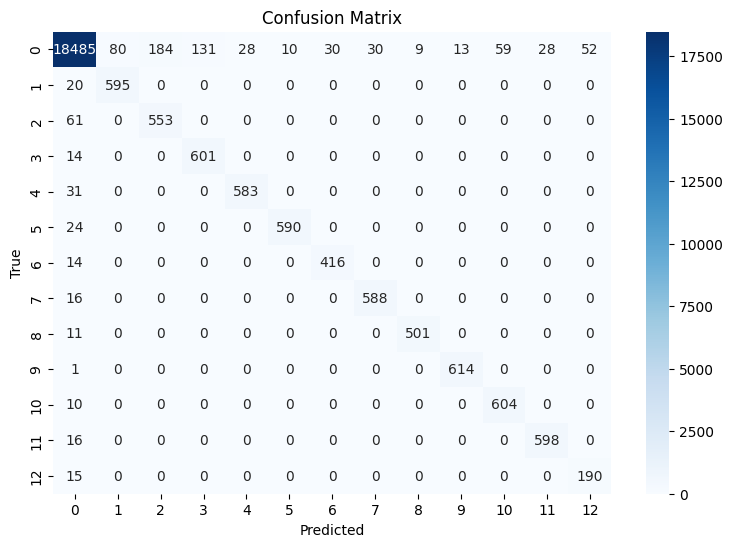

In [128]:
# Compute the confusion matrix
cm_rf8 = confusion_matrix(y_test8, y_pred_rf_test8)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_rf8, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [129]:
print("Random Forest classifier: Subject8")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_rftr8))
print("Best Validation Accuracy: {:.2f}".format(accuracy_rfval8))
print("Best Testing Accuracy: {:.2f}".format(accuracy_rftest8))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_rftr8))
print("Best Validation F1-score: {:.2f}".format(f1_rfval8))
print("Best Testing F1-score: {:.2f}".format(f1_rftest8))

Random Forest classifier: Subject8


Accuracy:
Best Training Accuracy: 1.00
Best Validation Accuracy: 0.97
Best Testing Accuracy: 0.97


F1-score:
Best Training F1-score: 1.00
Best Validation F1-score: 0.94
Best Testing F1-score: 0.94


### **Multilayer Perceptron (ANN)**

In [130]:
# Convert the target labels to categorical format
num_classes8 = len(np.unique(y8))
y_train_categorical8 = np_utils.to_categorical(y_train8, num_classes8)
y_val_categorical8 = np_utils.to_categorical(y_val8, num_classes8)
y_test_categorical8 = np_utils.to_categorical(y_test8, num_classes8)

# Create the MLP model
model8 = Sequential()
model8.add(Dense(64, input_dim=23, activation='relu'))
model8.add(Dense(32, activation='relu'))
model8.add(Dense(num_classes8, activation='softmax'))

# Compile the model
model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model8.fit(X_train8, y_train_categorical8, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the validation set
val_loss8, val_accuracy8 = model8.evaluate(X_val8, y_val_categorical8, verbose=1)
print('Validation Loss:', val_loss8)
print('Validation Accuracy:', val_accuracy8)

# Evaluate the model on the testing set
test_loss8, test_accuracy8 = model8.evaluate(X_test8, y_test_categorical8, verbose=1)
print('Testing Loss:', test_loss8)
print('Testing Accuracy:', test_accuracy8)

Epoch 1/20
2581/2581 [==============================] - 7s 2ms/step - loss: 0.6423 - accuracy: 0.8054
Epoch 2/20
2581/2581 [==============================] - 5s 2ms/step - loss: 0.3477 - accuracy: 0.8615
Epoch 3/20
2581/2581 [==============================] - 5s 2ms/step - loss: 0.2942 - accuracy: 0.8807
Epoch 4/20
2581/2581 [==============================] - 6s 2ms/step - loss: 0.2622 - accuracy: 0.8904
Epoch 5/20
2581/2581 [==============================] - 5s 2ms/step - loss: 0.2457 - accuracy: 0.8973
Epoch 6/20
2581/2581 [==============================] - 5s 2ms/step - loss: 0.2328 - accuracy: 0.9029
Epoch 7/20
2581/2581 [==============================] - 6s 2ms/step - loss: 0.2249 - accuracy: 0.9051
Epoch 8/20
2581/2581 [==============================] - 5s 2ms/step - loss: 0.2188 - accuracy: 0.9080
Epoch 9/20
2581/2581 [==============================] - 5s 2ms/step - loss: 0.2137 - accuracy: 0.9104
Epoch 10/20
2581/2581 [==============================] - 6s 2ms/step - loss: 0.208

## **Subject 9**

**Creating dataframe for Subject9**

In [131]:
file_path = '/content/gdrive/MyDrive/MHEALTHDATASET/mHealth_subject9.log'

accel_chest_x = []
accel_chest_y = []
accel_chest_z = []
ecg_lead1 = []
ecg_lead2 = []
accel_ankle_x = []
accel_ankle_y = []
accel_ankle_z = []
gyro_ankle_x = []
gyro_ankle_y = []
gyro_ankle_z = []
magnet_ankle_x = []
magnet_ankle_y = []
magnet_ankle_z = []
accel_arm_x = []
accel_arm_y = []
accel_arm_z = []
gyro_arm_x = []
gyro_arm_y = []
gyro_arm_z = []
magnet_arm_x = []
magnet_arm_y = []
magnet_arm_z = []
label = []

with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        accel_chest_x.append(float(values[0]))
        accel_chest_y.append(float(values[1]))
        accel_chest_z.append(float(values[2]))
        ecg_lead1.append(float(values[3]))
        ecg_lead2.append(float(values[4]))
        accel_ankle_x.append(float(values[5]))
        accel_ankle_y.append(float(values[6]))
        accel_ankle_z.append(float(values[7]))
        gyro_ankle_x.append(float(values[8]))
        gyro_ankle_y.append(float(values[9]))
        gyro_ankle_z.append(float(values[10]))
        magnet_ankle_x.append(float(values[11]))
        magnet_ankle_y.append(float(values[12]))
        magnet_ankle_z.append(float(values[13]))
        accel_arm_x.append(float(values[14]))
        accel_arm_y.append(float(values[15]))
        accel_arm_z.append(float(values[16]))
        gyro_arm_x.append(float(values[17]))
        gyro_arm_y.append(float(values[18]))
        gyro_arm_z.append(float(values[19]))
        magnet_arm_x.append(float(values[20]))
        magnet_arm_y.append(float(values[21]))
        magnet_arm_z.append(float(values[22]))
        label.append(int(values[23]))

# Convert the lists to a pandas DataFrame

subject9 = pd.DataFrame({
    'accel_chest_x': accel_chest_x,
    'accel_chest_y': accel_chest_y,
    'accel_chest_z': accel_chest_z,
    'ecg_lead1': ecg_lead1,
    'ecg_lead2': ecg_lead2,
    'accel_ankle_x': accel_ankle_x,
    'accel_ankle_y': accel_ankle_y,
    'accel_ankle_z': accel_ankle_z,
    'gyro_ankle_x': gyro_ankle_x,
    'gyro_ankle_y': gyro_ankle_y,
    'gyro_ankle_z': gyro_ankle_z,
    'magnet_ankle_x': magnet_ankle_x,
    'magnet_ankle_y': magnet_ankle_y,
    'magnet_ankle_z': magnet_ankle_z,
    'accel_arm_x': accel_arm_x,
    'accel_arm_y': accel_arm_y,
    'accel_arm_z': accel_arm_z,
    'gyro_arm_x': gyro_arm_x,
    'gyro_arm_y': gyro_arm_y,
    'gyro_arm_z': gyro_arm_z,
    'magnet_arm_x': magnet_arm_x,
    'magnet_arm_y': magnet_arm_y,
    'magnet_arm_z': magnet_arm_z,
    'label': label
})


In [132]:
subject9.head()

,accel_chest_x,accel_chest_y,accel_chest_z,ecg_lead1,ecg_lead2,accel_ankle_x,accel_ankle_y,accel_ankle_z,gyro_ankle_x,gyro_ankle_y,...,accel_arm_x,accel_arm_y,accel_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,label
0,-9.5767,-1.4661,-0.34247,-0.087912,0.037677,0.37048,-10.0150,0.50297,0.51206,-0.81426,...,-3.7504,-8.9035,0.64857,0.31373,-1.0883,0.32759,0.54755,0.89477,-0.72002,0
1,-9.5928,-1.1700,-0.67372,-0.108840,0.016745,0.37621,-9.8393,0.23055,0.51206,-0.81426,...,-3.7264,-8.8417,0.82875,0.31373,-1.0883,0.32759,0.54758,0.89837,-0.35904,0
2,-9.8840,-1.2555,-0.49195,-0.100470,0.037677,0.35848,-9.7266,0.61101,0.51206,-0.81426,...,-3.7811,-8.9232,0.67884,0.31373,-1.0883,0.32759,0.54577,0.71692,-0.35726,0
3,-9.5893,-1.3455,-0.28952,0.071167,0.163270,0.36937,-9.8759,0.53073,0.51206,-0.81426,...,-3.8521,-8.9727,0.72845,0.31569,-1.0842,0.32328,0.54577,0.71692,-0.35726,0
4,-9.8028,-1.2744,-0.54627,1.063300,0.502350,0.33570,-9.8390,0.26141,0.49722,-0.81614,...,-3.7814,-9.0327,0.72545,0.31569,-1.0842,0.32328,0.54395,0.53547,-0.35549,0


In [133]:
X9 = subject9.iloc[:,:-1]
y9 = subject9.iloc[:,-1]

In [134]:
X_train_org9, X_test9, y_train_org9, y_test9 = train_test_split(X9, y9, stratify=y9, random_state = 55, test_size= 0.20)
X_train9, X_val9, y_train9, y_val9 = train_test_split(X_train_org9, y_train_org9, stratify=y_train_org9, random_state = 55, test_size= 0.20)

### **Random Forest Classifier**

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Building the model
rf9 = RandomForestClassifier(random_state = 123)

# Train the classifier
rf9.fit(X_train9, y_train9)

# Predicting on training data
y_pred_rf9 = rf9.predict(X_train9)

# Predicting on validation data
y_pred_rf19 = rf9.predict(X_val9)

# Predicting on testing data
y_pred_rf_test9 = rf9.predict(X_test9)

In [136]:
# Evaluation for training data

# Calculate performance metrics
accuracy_rftr9 = accuracy_score(y_train9, y_pred_rf9)
precision_rftr9= precision_score(y_train9, y_pred_rf9, average = 'macro')
recall_rftr9 = recall_score(y_train9, y_pred_rf9, average = 'macro')
f1_rftr9 = f1_score(y_train9, y_pred_rf9, average = 'macro')
classification_rep_rftr9 = classification_report(y_train9, y_pred_rf9, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_rftr9))
print("Training Precision: {:.2f}".format(precision_rftr9))
print("Training Recall: {:.2f}".format(recall_rftr9))
print("Training F1-score: {:.2f}".format(f1_rftr9))

print("Classification Report:\n", classification_rep_rftr9)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     64521
           1      1.000     1.000     1.000      1966
           2      1.000     1.000     1.000      1966
           3      1.000     1.000     1.000      1966
           4      1.000     1.000     1.000      1966
           5      1.000     1.000     1.000      1966
           6      1.000     1.000     1.000      1835
           7      1.000     1.000     1.000      1835
           8      1.000     1.000     1.000      1900
           9      1.000     1.000     1.000      1966
          10      1.000     1.000     1.000      1966
          11      1.000     1.000     1.000      1966
          12      1.000     1.000     1.000       688

    accuracy                          1.000     86507
   macro avg      1.000     1.000     1.000     86507
weighted avg   

In [137]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_rfval9 = accuracy_score(y_val9, y_pred_rf19)
precision_rfval9= precision_score(y_val9, y_pred_rf19, average = 'macro')
recall_rfval9 = recall_score(y_val9, y_pred_rf19, average = 'macro')
f1_rfval9 = f1_score(y_val9, y_pred_rf19, average = 'macro')
classification_rep_rfval9 = classification_report(y_val9, y_pred_rf19, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_rfval9))
print("Validation Precision: {:.2f}".format(precision_rfval9))
print("Validation Recall: {:.2f}".format(recall_rfval9))
print("Validation F1-score: {:.2f}".format(f1_rfval9))

print("Classification Report:\n", classification_rep_rfval9)

Validation Accuracy: 0.96
Validation Precision: 0.89
Validation Recall: 0.95
Validation F1-score: 0.92
Classification Report:
               precision    recall  f1-score   support

           0      0.985     0.954     0.970     16130
           1      0.830     0.937     0.880       491
           2      0.871     0.976     0.920       492
           3      0.781     0.943     0.854       491
           4      0.895     0.971     0.932       491
           5      1.000     0.947     0.973       492
           6      0.957     0.976     0.967       459
           7      0.889     0.956     0.921       459
           8      0.920     0.994     0.955       475
           9      0.907     0.996     0.950       491
          10      0.815     0.988     0.893       492
          11      0.850     0.907     0.877       492
          12      0.829     0.820     0.825       172

    accuracy                          0.955     21627
   macro avg      0.887     0.951     0.917     21627
weighte

In [138]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_rftest9 = accuracy_score(y_test9, y_pred_rf_test9)
precision_rftest9= precision_score(y_test9, y_pred_rf_test9, average = 'macro')
recall_rftest9 = recall_score(y_test9, y_pred_rf_test9, average = 'macro')
f1_rftest9 = f1_score(y_test9, y_pred_rf_test9, average = 'macro')
classification_rep_rftest9 = classification_report(y_test9, y_pred_rf_test9, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_rftest9))
print("Testing Precision: {:.2f}".format(precision_rftest9))
print("Testing Recall: {:.2f}".format(recall_rftest9))
print("Testing F1-score: {:.2f}".format(f1_rftest9))

print("Classification Report:\n", classification_rep_rftest9)

Testing Accuracy: 0.95
Testing Precision: 0.89
Testing Recall: 0.95
Testing F1-score: 0.92
Classification Report:
               precision    recall  f1-score   support

           0      0.983     0.956     0.969     20163
           1      0.828     0.932     0.877       615
           2      0.886     0.972     0.927       614
           3      0.765     0.928     0.839       615
           4      0.915     0.976     0.944       615
           5      1.000     0.936     0.967       614
           6      0.957     0.983     0.970       573
           7      0.882     0.939     0.910       573
           8      0.935     0.985     0.959       594
           9      0.929     0.997     0.962       615
          10      0.800     0.985     0.883       614
          11      0.833     0.883     0.857       614
          12      0.889     0.823     0.855       215

    accuracy                          0.955     27034
   macro avg      0.892     0.946     0.917     27034
weighted avg      0

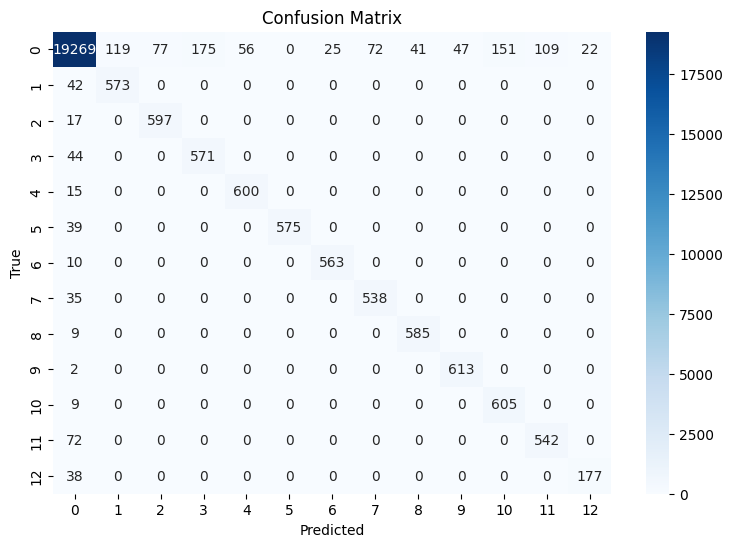

In [139]:
# Compute the confusion matrix
cm_rf9 = confusion_matrix(y_test9, y_pred_rf_test9)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_rf9, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [140]:
print("Random Forest classifier: Subject9")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_rftr9))
print("Best Validation Accuracy: {:.2f}".format(accuracy_rfval9))
print("Best Testing Accuracy: {:.2f}".format(accuracy_rftest9))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_rftr9))
print("Best Validation F1-score: {:.2f}".format(f1_rfval9))
print("Best Testing F1-score: {:.2f}".format(f1_rftest9))

Random Forest classifier: Subject9


Accuracy:
Best Training Accuracy: 1.00
Best Validation Accuracy: 0.96
Best Testing Accuracy: 0.95


F1-score:
Best Training F1-score: 1.00
Best Validation F1-score: 0.92
Best Testing F1-score: 0.92


### **Multilayer Perceptron (ANN)**

In [141]:
# Convert the target labels to categorical format
num_classes9 = len(np.unique(y9))
y_train_categorical9 = np_utils.to_categorical(y_train9, num_classes9)
y_val_categorical9 = np_utils.to_categorical(y_val9, num_classes9)
y_test_categorical9 = np_utils.to_categorical(y_test9, num_classes9)

# Create the MLP model
model9 = Sequential()
model9.add(Dense(64, input_dim=23, activation='relu'))
model9.add(Dense(32, activation='relu'))
model9.add(Dense(num_classes9, activation='softmax'))

# Compile the model
model9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model9.fit(X_train9, y_train_categorical9, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the validation set
val_loss9, val_accuracy9 = model9.evaluate(X_val9, y_val_categorical9, verbose=1)
print('Validation Loss:', val_loss9)
print('Validation Accuracy:', val_accuracy9)

# Evaluate the model on the testing set
test_loss9, test_accuracy9 = model9.evaluate(X_test9, y_test_categorical9, verbose=1)
print('Testing Loss:', test_loss9)
print('Testing Accuracy:', test_accuracy9)

Epoch 1/20
2704/2704 [==============================] - 6s 2ms/step - loss: 0.7308 - accuracy: 0.8084
Epoch 2/20
2704/2704 [==============================] - 6s 2ms/step - loss: 0.3630 - accuracy: 0.8570
Epoch 3/20
2704/2704 [==============================] - 5s 2ms/step - loss: 0.3063 - accuracy: 0.8724
Epoch 4/20
2704/2704 [==============================] - 6s 2ms/step - loss: 0.2760 - accuracy: 0.8804
Epoch 5/20
2704/2704 [==============================] - 6s 2ms/step - loss: 0.2596 - accuracy: 0.8857
Epoch 6/20
2704/2704 [==============================] - 5s 2ms/step - loss: 0.2472 - accuracy: 0.8897
Epoch 7/20
2704/2704 [==============================] - 6s 2ms/step - loss: 0.2376 - accuracy: 0.8936
Epoch 8/20
2704/2704 [==============================] - 5s 2ms/step - loss: 0.2308 - accuracy: 0.8967
Epoch 9/20
2704/2704 [==============================] - 5s 2ms/step - loss: 0.2235 - accuracy: 0.9007
Epoch 10/20
2704/2704 [==============================] - 6s 2ms/step - loss: 0.219

## **Subject 10**

**Creating dataframe for Subject10**

In [142]:
file_path = '/content/gdrive/MyDrive/MHEALTHDATASET/mHealth_subject10.log'

accel_chest_x = []
accel_chest_y = []
accel_chest_z = []
ecg_lead1 = []
ecg_lead2 = []
accel_ankle_x = []
accel_ankle_y = []
accel_ankle_z = []
gyro_ankle_x = []
gyro_ankle_y = []
gyro_ankle_z = []
magnet_ankle_x = []
magnet_ankle_y = []
magnet_ankle_z = []
accel_arm_x = []
accel_arm_y = []
accel_arm_z = []
gyro_arm_x = []
gyro_arm_y = []
gyro_arm_z = []
magnet_arm_x = []
magnet_arm_y = []
magnet_arm_z = []
label = []

with open(file_path, 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        accel_chest_x.append(float(values[0]))
        accel_chest_y.append(float(values[1]))
        accel_chest_z.append(float(values[2]))
        ecg_lead1.append(float(values[3]))
        ecg_lead2.append(float(values[4]))
        accel_ankle_x.append(float(values[5]))
        accel_ankle_y.append(float(values[6]))
        accel_ankle_z.append(float(values[7]))
        gyro_ankle_x.append(float(values[8]))
        gyro_ankle_y.append(float(values[9]))
        gyro_ankle_z.append(float(values[10]))
        magnet_ankle_x.append(float(values[11]))
        magnet_ankle_y.append(float(values[12]))
        magnet_ankle_z.append(float(values[13]))
        accel_arm_x.append(float(values[14]))
        accel_arm_y.append(float(values[15]))
        accel_arm_z.append(float(values[16]))
        gyro_arm_x.append(float(values[17]))
        gyro_arm_y.append(float(values[18]))
        gyro_arm_z.append(float(values[19]))
        magnet_arm_x.append(float(values[20]))
        magnet_arm_y.append(float(values[21]))
        magnet_arm_z.append(float(values[22]))
        label.append(int(values[23]))

# Convert the lists to a pandas DataFrame

subject10 = pd.DataFrame({
    'accel_chest_x': accel_chest_x,
    'accel_chest_y': accel_chest_y,
    'accel_chest_z': accel_chest_z,
    'ecg_lead1': ecg_lead1,
    'ecg_lead2': ecg_lead2,
    'accel_ankle_x': accel_ankle_x,
    'accel_ankle_y': accel_ankle_y,
    'accel_ankle_z': accel_ankle_z,
    'gyro_ankle_x': gyro_ankle_x,
    'gyro_ankle_y': gyro_ankle_y,
    'gyro_ankle_z': gyro_ankle_z,
    'magnet_ankle_x': magnet_ankle_x,
    'magnet_ankle_y': magnet_ankle_y,
    'magnet_ankle_z': magnet_ankle_z,
    'accel_arm_x': accel_arm_x,
    'accel_arm_y': accel_arm_y,
    'accel_arm_z': accel_arm_z,
    'gyro_arm_x': gyro_arm_x,
    'gyro_arm_y': gyro_arm_y,
    'gyro_arm_z': gyro_arm_z,
    'magnet_arm_x': magnet_arm_x,
    'magnet_arm_y': magnet_arm_y,
    'magnet_arm_z': magnet_arm_z,
    'label': label
})


In [143]:
subject10.head()

,accel_chest_x,accel_chest_y,accel_chest_z,ecg_lead1,ecg_lead2,accel_ankle_x,accel_ankle_y,accel_ankle_z,gyro_ankle_x,gyro_ankle_y,...,accel_arm_x,accel_arm_y,accel_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,label
0,-9.6997,-0.87525,-0.96298,-0.029304,-0.079540,0.28409,-9.5692,1.4931,0.70501,-0.48968,...,-0.98630,-8.7188,4.1161,0.64510,-0.45175,0.69181,0.71991,0.17803,0.37363,0
1,-9.4890,-0.80103,-1.10370,-0.062794,-0.092098,0.41798,-9.6980,1.4880,0.70501,-0.48968,...,-0.98795,-9.0372,4.2773,0.66667,-0.44353,0.66810,0.54040,0.17978,0.37002,0
2,-9.5541,-1.08310,-1.24480,-0.075353,-0.117220,0.33479,-9.5896,1.4405,0.69388,-0.48593,...,-0.89327,-8.7099,4.0124,0.66667,-0.44353,0.66810,0.72539,0.72599,0.72927,0
3,-9.3680,-0.79141,-0.93438,-0.092098,-0.129770,0.27516,-9.6480,1.5412,0.69388,-0.48593,...,-0.95632,-8.7986,4.1434,0.66667,-0.44353,0.66810,0.54392,0.53186,-0.71646,0
4,-9.6678,-0.95335,-1.20160,-0.092098,-0.129770,0.32434,-9.6298,1.3759,0.69388,-0.48593,...,-0.95808,-8.5089,4.1058,0.66863,-0.45175,0.69181,0.54210,0.35041,-0.71468,0


In [144]:
X10 = subject10.iloc[:,:-1]
y10 = subject10.iloc[:,-1]

In [145]:
X_train_org10, X_test10, y_train_org10, y_test10 = train_test_split(X10, y10, stratify=y10, random_state = 55, test_size= 0.20)
X_train10, X_val10, y_train10, y_val10 = train_test_split(X_train_org10, y_train_org10, stratify=y_train_org10, random_state = 55, test_size= 0.20)

### **Random Forest Classifier**

In [146]:
from sklearn.ensemble import RandomForestClassifier

# Building the model
rf10 = RandomForestClassifier(random_state = 123)

# Train the classifier
rf10.fit(X_train10, y_train10)

# Predicting on training data
y_pred_rf10 = rf10.predict(X_train10)

# Predicting on validation data
y_pred_rf110 = rf10.predict(X_val10)

# Predicting on testing data
y_pred_rf_test10 = rf10.predict(X_test10)

In [147]:
# Evaluation for training data

# Calculate performance metrics
accuracy_rftr10 = accuracy_score(y_train10, y_pred_rf10)
precision_rftr10= precision_score(y_train10, y_pred_rf10, average = 'macro')
recall_rftr10 = recall_score(y_train10, y_pred_rf10, average = 'macro')
f1_rftr10 = f1_score(y_train10, y_pred_rf10, average = 'macro')
classification_rep_rftr10 = classification_report(y_train10, y_pred_rf10, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Training Accuracy: {:.2f}".format(accuracy_rftr10))
print("Training Precision: {:.2f}".format(precision_rftr10))
print("Training Recall: {:.2f}".format(recall_rftr10))
print("Training F1-score: {:.2f}".format(f1_rftr10))

print("Classification Report:\n", classification_rep_rftr10)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     41353
           1      1.000     1.000     1.000      1966
           2      1.000     1.000     1.000      1966
           3      1.000     1.000     1.000      1966
           4      1.000     1.000     1.000      1966
           5      1.000     1.000     1.000      1966
           6      1.000     1.000     1.000      1573
           7      1.000     1.000     1.000      1770
           8      1.000     1.000     1.000      1835
           9      1.000     1.000     1.000      1966
          10      1.000     1.000     1.000      1966
          11      1.000     1.000     1.000      1966
          12      1.000     1.000     1.000       655

    accuracy                          1.000     62914
   macro avg      1.000     1.000     1.000     62914
weighted avg   

In [148]:
# Evaluation for validation data

# Calculate performance metrics
accuracy_rfval10 = accuracy_score(y_val10, y_pred_rf110)
precision_rfval10= precision_score(y_val10, y_pred_rf110, average = 'macro')
recall_rfval10 = recall_score(y_val10, y_pred_rf110, average = 'macro')
f1_rfval10 = f1_score(y_val10, y_pred_rf110, average = 'macro')
classification_rep_rfval10 = classification_report(y_val10, y_pred_rf110, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Validation Accuracy: {:.2f}".format(accuracy_rfval10))
print("Validation Precision: {:.2f}".format(precision_rfval10))
print("Validation Recall: {:.2f}".format(recall_rfval10))
print("Validation F1-score: {:.2f}".format(f1_rfval10))

print("Classification Report:\n", classification_rep_rfval10)

Validation Accuracy: 0.96
Validation Precision: 0.92
Validation Recall: 0.97
Validation F1-score: 0.95
Classification Report:
               precision    recall  f1-score   support

           0      0.991     0.953     0.971     10338
           1      0.945     0.988     0.966       491
           2      0.890     0.941     0.915       492
           3      0.907     0.988     0.945       491
           4      0.918     0.996     0.955       492
           5      0.998     0.980     0.989       492
           6      0.938     0.997     0.967       393
           7      0.936     0.998     0.966       442
           8      0.909     0.983     0.945       459
           9      0.912     0.990     0.949       491
          10      0.882     0.998     0.936       492
          11      0.860     1.000     0.925       492
          12      0.908     0.848     0.877       164

    accuracy                          0.963     15729
   macro avg      0.923     0.974     0.947     15729
weighte

In [149]:
# Evaluation for testing data

# Calculate performance metrics
accuracy_rftest10 = accuracy_score(y_test10, y_pred_rf_test10)
precision_rftest10= precision_score(y_test10, y_pred_rf_test10, average = 'macro')
recall_rftest10 = recall_score(y_test10, y_pred_rf_test10, average = 'macro')
f1_rftest10 = f1_score(y_test10, y_pred_rf_test10, average = 'macro')
classification_rep_rftest10 = classification_report(y_test10, y_pred_rf_test10, digits=3)

# Print performance metrics and classification report
# print evaluation results with 2 decimal points
print("Testing Accuracy: {:.2f}".format(accuracy_rftest10))
print("Testing Precision: {:.2f}".format(precision_rftest10))
print("Testing Recall: {:.2f}".format(recall_rftest10))
print("Testing F1-score: {:.2f}".format(f1_rftest10))

print("Classification Report:\n", classification_rep_rftest10)

Testing Accuracy: 0.96
Testing Precision: 0.92
Testing Recall: 0.96
Testing F1-score: 0.94
Classification Report:
               precision    recall  f1-score   support

           0      0.988     0.953     0.970     12923
           1      0.944     0.989     0.966       615
           2      0.900     0.933     0.916       614
           3      0.933     0.989     0.960       615
           4      0.918     0.987     0.951       614
           5      1.000     0.990     0.995       614
           6      0.944     0.994     0.968       492
           7      0.913     0.991     0.951       553
           8      0.935     0.979     0.957       573
           9      0.899     0.985     0.940       615
          10      0.865     0.992     0.924       614
          11      0.848     1.000     0.918       614
          12      0.922     0.746     0.825       205

    accuracy                          0.961     19661
   macro avg      0.924     0.964     0.942     19661
weighted avg      0

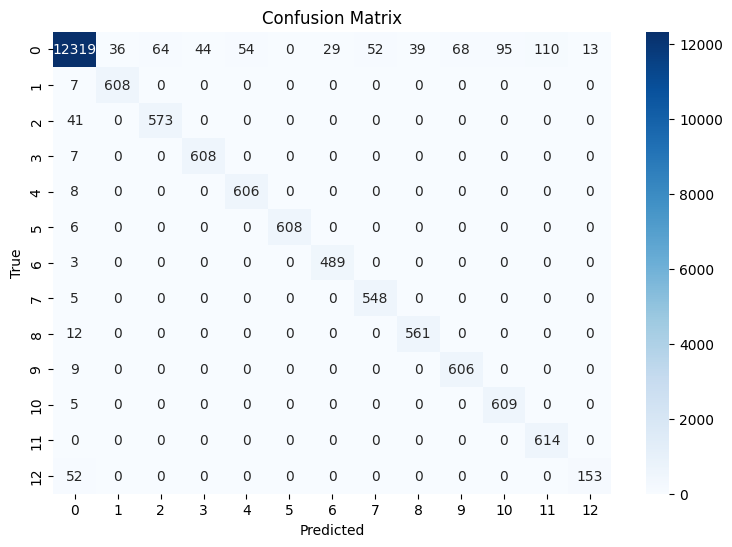

In [150]:
# Compute the confusion matrix
cm_rf10 = confusion_matrix(y_test10, y_pred_rf_test10)

# Set the figure size
plt.figure(figsize=(9, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm_rf10, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [151]:
print("Random Forest classifier: Subject10")
print('\n')
print('Accuracy:')
print("Best Training Accuracy: {:.2f}".format(accuracy_rftr10))
print("Best Validation Accuracy: {:.2f}".format(accuracy_rfval10))
print("Best Testing Accuracy: {:.2f}".format(accuracy_rftest10))
print('\n')
print('F1-score:')
print("Best Training F1-score: {:.2f}".format(f1_rftr10))
print("Best Validation F1-score: {:.2f}".format(f1_rfval10))
print("Best Testing F1-score: {:.2f}".format(f1_rftest10))

Random Forest classifier: Subject10


Accuracy:
Best Training Accuracy: 1.00
Best Validation Accuracy: 0.96
Best Testing Accuracy: 0.96


F1-score:
Best Training F1-score: 1.00
Best Validation F1-score: 0.95
Best Testing F1-score: 0.94


### **Multilayer Perceptron (ANN)**

In [152]:
# Convert the target labels to categorical format
num_classes10 = len(np.unique(y10))
y_train_categorical10 = np_utils.to_categorical(y_train10, num_classes10)
y_val_categorical10 = np_utils.to_categorical(y_val10, num_classes10)
y_test_categorical10 = np_utils.to_categorical(y_test10, num_classes10)

# Create the MLP model
model10 = Sequential()
model10.add(Dense(64, input_dim=23, activation='relu'))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(num_classes10, activation='softmax'))

# Compile the model
model10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model10.fit(X_train10, y_train_categorical10, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the validation set
val_loss10, val_accuracy10 = model10.evaluate(X_val10, y_val_categorical10, verbose=1)
print('Validation Loss:', val_loss10)
print('Validation Accuracy:', val_accuracy10)

# Evaluate the model on the testing set
test_loss10, test_accuracy10 = model10.evaluate(X_test10, y_test_categorical10, verbose=1)
print('Testing Loss:', test_loss10)
print('Testing Accuracy:', test_accuracy10)

Epoch 1/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.7633 - accuracy: 0.7721
Epoch 2/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.4086 - accuracy: 0.8480
Epoch 3/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.3438 - accuracy: 0.8682
Epoch 4/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8776
Epoch 5/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.2864 - accuracy: 0.8857
Epoch 6/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.2719 - accuracy: 0.8931
Epoch 7/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.2592 - accuracy: 0.8971
Epoch 8/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.2487 - accuracy: 0.9007
Epoch 9/20
1967/1967 [==============================] - 4s 2ms/step - loss: 0.2439 - accuracy: 0.9029
Epoch 10/20
1967/1967 [==============================] - 3s 2ms/step - loss: 0.234

## **Result**

In [153]:
print('Subject1:')
print("=========")
print("Random Forest Classifier:-")
print("Testing Accuracy: {:.2f}".format(accuracy_rftest))
print("Testing F1-score: {:.2f}".format(f1_rftest))
print("MLP model:-")
print('Testing Loss:', test_loss)
print('Testing Accuracy:', test_accuracy)
print('\n')

print('Subject2:')
print("=========")
print("Random Forest Classifier:-")
print("Testing Accuracy: {:.2f}".format(accuracy_rftest2))
print("Testing F1-score: {:.2f}".format(f1_rftest2))
print("MLP model:-")
print('Testing Loss:', test_loss2)
print('Testing Accuracy:', test_accuracy2)
print('\n')

print('Subject3:')
print("=========")
print("Random Forest Classifier:-")
print("Testing Accuracy: {:.2f}".format(accuracy_rftest3))
print("Testing F1-score: {:.2f}".format(f1_rftest3))
print("MLP model:-")
print('Testing Loss:', test_loss3)
print('Testing Accuracy:', test_accuracy3)
print('\n')

print('Subject4:')
print("=========")
print("Random Forest Classifier:-")
print("Testing Accuracy: {:.2f}".format(accuracy_rftest4))
print("Testing F1-score: {:.2f}".format(f1_rftest4))
print("MLP model:-")
print('Testing Loss:', test_loss4)
print('Testing Accuracy:', test_accuracy4)
print('\n')

print('Subject5:')
print("=========")
print("Random Forest Classifier:-")
print("Testing Accuracy: {:.2f}".format(accuracy_rftest5))
print("Testing F1-score: {:.2f}".format(f1_rftest5))
print("MLP model:-")
print('Testing Loss:', test_loss5)
print('Testing Accuracy:', test_accuracy5)
print('\n')

print('Subject6:')
print("=========")
print("Random Forest Classifier:-")
print("Testing Accuracy: {:.2f}".format(accuracy_rftest6))
print("Testing F1-score: {:.2f}".format(f1_rftest6))
print("MLP model:-")
print('Testing Loss:', test_loss6)
print('Testing Accuracy:', test_accuracy6)
print('\n')

print('Subject7:')
print("=========")
print("Random Forest Classifier:-")
print("Testing Accuracy: {:.2f}".format(accuracy_rftest7))
print("Testing F1-score: {:.2f}".format(f1_rftest7))
print("MLP model:-")
print('Testing Loss:', test_loss7)
print('Testing Accuracy:', test_accuracy7)
print('\n')

print('Subject8:')
print("=========")
print("Random Forest Classifier:-")
print("Testing Accuracy: {:.2f}".format(accuracy_rftest8))
print("Testing F1-score: {:.2f}".format(f1_rftest8))
print("MLP model:-")
print('Testing Loss:', test_loss8)
print('Testing Accuracy:', test_accuracy8)
print('\n')

print('Subject9:')
print("=========")
print("Random Forest Classifier:-")
print("Testing Accuracy: {:.2f}".format(accuracy_rftest9))
print("Testing F1-score: {:.2f}".format(f1_rftest9))
print("MLP model:-")
print('Testing Loss:', test_loss9)
print('Testing Accuracy:', test_accuracy9)
print('\n')

print('Subject10:')
print("=========")
print("Random Forest Classifier:-")
print("Testing Accuracy: {:.2f}".format(accuracy_rftest10))
print("Testing F1-score: {:.2f}".format(f1_rftest10))
print("MLP model:-")
print('Testing Loss:', test_loss10)
print('Testing Accuracy:', test_accuracy10)
print('\n')

Subject1:
Random Forest Classifier:-
Testing Accuracy: 0.97
Testing F1-score: 0.93
MLP model:-
Testing Loss: 0.20093685388565063
Testing Accuracy: 0.9182477593421936


Subject2:
Random Forest Classifier:-
Testing Accuracy: 0.96
Testing F1-score: 0.92
MLP model:-
Testing Loss: 0.21746885776519775
Testing Accuracy: 0.9134913682937622


Subject3:
Random Forest Classifier:-
Testing Accuracy: 0.97
Testing F1-score: 0.94
MLP model:-
Testing Loss: 0.2519665062427521
Testing Accuracy: 0.8940343260765076


Subject4:
Random Forest Classifier:-
Testing Accuracy: 0.96
Testing F1-score: 0.94
MLP model:-
Testing Loss: 0.25482988357543945
Testing Accuracy: 0.8948089480400085


Subject5:
Random Forest Classifier:-
Testing Accuracy: 0.96
Testing F1-score: 0.92
MLP model:-
Testing Loss: 0.26744017004966736
Testing Accuracy: 0.8901594281196594


Subject6:
Random Forest Classifier:-
Testing Accuracy: 0.96
Testing F1-score: 0.95
MLP model:-
Testing Loss: 0.21960099041461945
Testing Accuracy: 0.913737833499